In [6]:
import pandas as pd
comments=pd.read_excel('evaluations_overall_comments.xlsx')

In [7]:
comments

,Target:,Evaluator:,Rotation Dates:,Service:,Answer:
0,Eliza Chen,"Dr. Ong, Andrew Ming Liang",7/1/2022-7/31/2022,- -,Eliza Chen is starting out and therefore as ex...
1,Eliza Chen,"Dr. Chan, Webber Pak Wo",7/1/2022-7/31/2022,SHS-GASTRO:BASIC ENDO-SGH,"As a new senior resident to gastroenterology, ..."
2,Eliza Chen,"Dr. Lim, Chee Hooi",7/1/2022-7/31/2022,SHS-GASTRO:BASIC ENDO-SGH,No concern
3,Eliza Chen,"Dr. Chang, Jason Pik Eu",8/1/2022-8/31/2022,SHS-GASTRO:BASIC ENDO-SGH,Overall I would rate Eliza Chen highly as a SR...
4,Eliza Chen,"Dr. Tan, Chee Kiat",8/1/2022-8/31/2022,SHS-GASTRO:BASIC ENDO-SGH,Eliza Chen has a quiet disposition and gives g...
...,...,...,...,...,...
163,Rachel Yeap,"Dr. Tan, Malcolm Teck Kiang",7/1/2022-7/31/2022,SHS-GASTRO:GEN GASTROHEP-SGH,"did a week of bleeder call, good mgmt plans an..."
164,Rachel Yeap,"Dr. Khor, Christopher Jen Lock",8/1/2022-8/31/2022,SHS-GASTRO:GEN GASTROHEP-SGH,"very competent, extremely professional, and a ..."
165,Rachel Yeap,"Dr. Liou, Wei Lun",8/1/2022-8/31/2022,SHS-GASTRO:GEN GASTROHEP-SGH,No issue. Making good progress compared to fir...
166,Rachel Yeap,"Dr. Loo, Khang Ning",9/1/2022-10/2/2022,SHS-IM:GEN MED-SGH,Rachel is clinically competent and I can trust...


In [ ]:
#install vaderSentimentlibrary
# !pip install vaderSentiment

#import the library
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#calculate the negative, positive, neutral and compound scores, plus verbal evaluation
def sentiment_vader(sentence):

    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()

    sentiment_dict = sid_obj.polarity_scores(sentence)
    negative = sentiment_dict['neg']
    neutral = sentiment_dict['neu']
    positive = sentiment_dict['pos']
    compound = sentiment_dict['compound']

    if sentiment_dict['compound'] >= 0.05 :
        overall_sentiment = "Positive"

    elif sentiment_dict['compound'] <= - 0.05 :
        overall_sentiment = "Negative"

    else :
        overall_sentiment = "Neutral"
  
    # return negative, neutral, positive, compound, overall_sentiment
    return compound


comments['Vader1 Score']=comments.apply(lambda x: sentiment_vader(x['Answer:']),axis=1)
comments['Vader1 Score']

0      0.8954
1      0.2732
2     -0.2960
3      0.8807
4      0.6290
        ...  
163    0.3818
164    0.7425
165    0.5423
166    0.7184
167    0.5719
Name: Vader1 Score, Length: 168, dtype: float64

In [ ]:
comments[['Vader1 Score','Answer:']].loc[comments['Target:'] == 'Andre Tan']


,Vader1 Score,Answer:
115,0.6801,Andre could improve by showing more motivation...
116,0.5267,Whilst Andre puts in effort to review patients...
117,0.6353,He needs to be more proactive in learning . He...
118,0.6124,"Works well with team. Reliable, safe"
119,0.4588,Andre showed some improvement in his IBD knowl...
120,0.1027,I think overall whilst Andre is not a malignan...
121,0.4588,He is making some improvement with feedback in...
122,0.7506,We had discussed previously about Andre's 5 pe...
123,0.8442,Hope he will continue to improve in his clinic...
124,0.0000,Andre would need to show more dedication to le...


In [ ]:
comments[['Answer:']].loc[comments['Vader1 Score'] == 0.0000]


,Answer:
10,"Overall, her performance is within the level o..."
20,able to act independently in most of the clini...
21,Gabrielle is a hardworking SR who puts in extr...
28,"hardworking, reliable, teamplayer"
50,Able to work almost independently.n
65,Dr. Li is a hardworking SR that has the requir...
81,Sam has all the qualities and skills expected ...
83,Sam is very steady and a reliable SR
84,Progressing as expected
101,Meets expectation. Continue to work on medical...


In [ ]:

# install textblob
# !pip install textblob

# import it
from textblob import TextBlob

#call the classifier
def sentiment_texblob(row):
  
    classifier = TextBlob(row)
    polarity = classifier.sentiment.polarity
    subjectivity = classifier.sentiment.subjectivity
    
    return polarity

comments['Textblob Score']=comments.apply(lambda x: sentiment_texblob(x['Answer:']),axis=1)
comments['Textblob Score']

0      0.171429
1      0.136364
2      0.000000
3      0.263750
4      0.330000
         ...   
163    0.440625
164    0.375000
165    0.475000
166    0.000000
167    0.233333
Name: Textblob Score, Length: 168, dtype: float64

In [ ]:
comments[['Answer:']].loc[comments['Textblob Score'] == 0.000000]


,Answer:
2,No concern
5,Please see comments above
6,"Conscientious, thorough, works in a team, keen..."
10,"Overall, her performance is within the level o..."
12,Meets expectation. Has improved in terms of cl...
14,She has improved a lot. Trustworthy.
18,No concern
21,Gabrielle is a hardworking SR who puts in extr...
24,Meets expectation. Dependable and guides junio...
25,Progressing well


In [ ]:
!pip install yake

     ---------------------------------------- 0.0/60.2 kB ? eta -:--:--
     ------------------------- ------------ 41.0/60.2 kB 653.6 kB/s eta 0:00:01
     -------------------------------------- 60.2/60.2 kB 805.2 kB/s eta 0:00:00


In [ ]:
import pandas as pd
import yake
import nltk
nltk.download('averaged_perceptron_tagger')

# Define the YAKE keyword extractor with desired settings
kw_extractor = yake.KeywordExtractor(n=2, top=5, dedupLim=0.8, windowsSize=1, features=None)

# Define a function to extract keywords from text, ignoring names and proper nouns
def extract_keywords(text):
    # Use NLTK to tag words with part-of-speech (POS) tags
    tagged_words = nltk.pos_tag(nltk.word_tokenize(text))
    # Exclude words that are proper nouns or start with a capital letter
    words = [word for word, tag in tagged_words if tag != 'NNP' and not word.istitle()]
    # Use YAKE to extract keywords from the remaining words
    keywords = [kw for kw, score in kw_extractor.extract_keywords(" ".join(words))]
    # Join keywords into a string separated by commas
    return ", ".join(keywords)

# Load DataFrame with text in column "text_column"
df = pd.read_excel('evaluations_overall_comments.xlsx')

# Apply the extract_keywords function to "text_column" and store results in new column "keywords_column"
df["keywords_column"] = df["Answer:"].apply(lambda x: extract_keywords(x))

# Print the resulting DataFrame
df.to_csv('data_with_keywords.csv', index=False)


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\WongQiHuiYve\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

n_gram_range = (1, 1)
stop_words = "english"

sentences=comments['Answer:'].values.tolist()
# Extract candidate words/phrases
count = CountVectorizer(ngram_range=n_gram_range, stop_words=stop_words).fit(sentences)
candidates = count.get_feature_names()

model = SentenceTransformer('distilbert-base-nli-mean-tokens')
# doc_embedding = model.encode([doc])
candidate_embeddings = model.encode(candidates)
# doc_embedding
comments['Doc_Embed']=comments.apply(lambda x: model.encode([x['Answer:']]),axis=1)
comments['Distance']=comments.apply(lambda x:cosine_similarity(x['Doc_Embed'],candidate_embeddings),axis=1)
top_n = 5

comments['Keywords']=comments['Distance'].apply(lambda x: [candidates[index] for index in x.argsort()[0][-top_n:]])

comments['Keywords']

c:\Users\WongQiHuiYve\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


KeyboardInterrupt: 

In [ ]:
import pandas as pd
import nltk

# Load the DataFrame
df = pd.read_excel('evaluations_overall_comments.xlsx')


# Define a function to extract adjectives from text
def extract_adjectives(text):
    # Tokenize the text into words
    # nltk.download('punkt')
    # nltk.download('averaged_perceptron_tagger')
    words = nltk.word_tokenize(text)
    
    # Tag each word with its part of speech
    pos_tags = nltk.pos_tag(words)
    
    # Extract adjectives from the tagged words
    adjectives = [word for word, pos in pos_tags if pos.startswith('JJ')]
    
    # Join the adjectives into a single string
    keywords = ' '.join(adjectives)
    
    return keywords

# # Apply the function to the text column of the DataFrame
df['keywords'] = df['Answer:'].apply(lambda x:extract_adjectives(x))

# # Print the DataFrame
print(df['keywords'])

0                                  right systematic more
1                                    new senior clinical
2                                                       
3                   Overall medical higher critical more
4                            quiet good quiet good aware
                             ...                        
163                            good more competent major
164                               competent professional
165                                           good first
166    competent junior several difficult pro junior ...
167                                  Able key reasonable
Name: keywords, Length: 168, dtype: object


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

df = pd.read_excel('evaluations_overall_comments.xlsx')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
def preprocess_and_extract_adj_adv(text):
    # Tokenize the text into words
    words = word_tokenize(text)
    
    # Convert words to lowercase
    words = [word.lower() for word in words]
    
    # Remove stopwords and non-alphabetic words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word.isalpha() and word not in stop_words]
    
    # Perform lemmatization to reduce inflected forms to their base form
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word, pos='a') for word in words]  # Lemmatize adjectives
    words = [lemmatizer.lemmatize(word, pos='r') for word in words]  # Lemmatize adverbs
    
    # Perform part-of-speech tagging and extract adjectives and adverbs
    tagged_words = nltk.pos_tag(words)
    adj_adv_words = [word for word, pos in tagged_words if pos.startswith('JJ')]
    # RB
    # Join the adjectives and adverbs back into a single string
    adj_adv_text = ' '.join(adj_adv_words)
    
    return adj_adv_text

# # Apply the function to the text column of the DataFrame
df['keywords'] = df['Answer:'].apply(lambda x:preprocess_and_extract_adj_adv(x))

# # Print the DataFrame
print(df['keywords'])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\WongQiHuiYve\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\WongQiHuiYve\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\WongQiHuiYve\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\WongQiHuiYve\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\WongQiHuiYve\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


0                             low right systematic lead
1                                   new senior clinical
2                                                      
3      overall medical high critical follow patient sbp
4                   quiet good quiet good discuss aware
                             ...                       
163                           good need competent major
164                                        professional
165                                          good first
166       competent junior several difficult pro junior
167                        able key reasonable medicine
Name: keywords, Length: 168, dtype: object


In [ ]:
import pandas as pd
import nltk
nltk.download('averaged_perceptron_tagger')

# Define a function to extract unique adjectives and adverbs from text
def extract_descriptors(text):
    # Use NLTK to tag words with part-of-speech (POS) tags
    tagged_words = nltk.pos_tag(nltk.word_tokenize(text))
    # Extract unique adjectives and adverbs from the tagged words
    adjectives = set([word for word, tag in tagged_words if tag.startswith('JJ')])
    adverbs = set([word for word, tag in tagged_words if tag.startswith('RB')])
    # Combine the unique adjectives and adverbs into one set
    descriptors = adjectives.union(adverbs)
    # Join descriptors into a string separated by commas
    return ", ".join(descriptors)

# Load DataFrame with text in column "text_column"
df = pd.read_excel('evaluations_overall_comments.xlsx')

# Apply the extract_descriptors function to "text_column" and store results in new column "descriptors_column"
df["descriptors_column"] = df["Answer:"].apply(lambda x: extract_descriptors(x))

# Print the resulting DataFrame
df.to_csv('data with descriptors.csv', index=False)



[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\WongQiHuiYve\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger') # download the necessary tagger

from nltk.corpus import stopwords
custom_stopwords = set(["overall", "clinical",'medical']) # define your custom stopwords here
df = pd.read_excel('evaluations_overall_comments.xlsx')

def extract_unique_adjectives(text):
    adjectives = []
    tagged_words = nltk.pos_tag(nltk.word_tokenize(text.lower()))
    for word, tag in tagged_words:
        if tag == "JJ" and word not in custom_stopwords:
            adjectives.append(word)
    return ", ".join(list(set(adjectives))) # return only unique adjectives

df["adjectives_column"] = df["Answer:"].apply(lambda x: extract_unique_adjectives(x)) # create new column
df.to_csv('data with adjectives.csv', index=False)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\WongQiHuiYve\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
comments['Keywords']

0      [outpatient, professionalism, holistic, teacha...
1      [pharmacists, medicine, inpatients, inpatient,...
2         [quiet, independently, minimal, passive, lack]
3       [medical, doctors, healthcare, nurses, medicine]
4        [caring, calm, diligent, polite, introspective]
                             ...                        
163    [outpatient, medicine, colonoscopes, 2022, col...
164    [professionalism, treasured, reliable, efficie...
165      [maturity, completed, matures, mature, matured]
166    [doctors, medicine, inpatient, inpatients, nur...
167    [inpatients, medical, inpatient, healthcare, m...
Name: Keywords, Length: 168, dtype: object

In [ ]:
comments[['Keywords']].loc[comments['Vader1 Score'] <= 0.000000]


,Keywords
2,"[quiet, independently, minimal, passive, lack]"
10,"[practice, competencies, requisite, discipline..."
16,"[matured, healthcare, inpatients, clinics, pro..."
18,"[quiet, independently, minimal, passive, lack]"
19,"[lacking, outpatient, short, limited, weakness]"
20,"[diligently, professionalism, clinical, mature..."
21,"[competing, competency, competencies, training..."
28,"[professionalism, proactive, reliable, hardwor..."
50,"[settled, independent, independently, efficien..."
63,"[overthinks, doubts, limited, receptive, unsure]"


In [ ]:
comments[['Keywords']].loc[comments['Textblob Score'] <= 0.000000]


,Keywords
2,"[quiet, independently, minimal, passive, lack]"
5,"[posting, presentation, discusses, presentatio..."
6,"[professionalism, trustworthy, training, teach..."
10,"[practice, competencies, requisite, discipline..."
11,"[competing, training, competencies, hardworkin..."
12,"[teachable, treatments, diagnostic, improvemen..."
14,"[improving, improves, efficient, receptive, im..."
18,"[quiet, independently, minimal, passive, lack]"
19,"[lacking, outpatient, short, limited, weakness]"
21,"[competing, competency, competencies, training..."


In [ ]:
# WORDCLOUD
from itertools import chain
out = (comments.groupby('Target:', as_index=False)['Keywords']
         .agg(lambda x: list(chain.from_iterable(x)))
       )


In [ ]:
out

,Target:,Keywords
0,Amanda Koh,"[new, juniors, competing, outpatient, beginner..."
1,Andre Tan,"[improving, teaching, educating, colleagues, t..."
2,Christopher Tan,"[sr3, majority, 3rd, juniors, beginner, inpati..."
3,Eliza Chen,"[outpatient, professionalism, holistic, teacha..."
4,Francisco Tan,"[physician, healthcare, doctors, professionali..."
5,Gabrielle Ho,"[practice, competencies, requisite, discipline..."
6,James Wang,"[physician, medicine, doctors, inpatients, inp..."
7,Jiang Xiao Ye,"[respected, reliable, caring, trustworthy, pol..."
8,Justin Bieber,"[hardworking, teachable, reliable, professiona..."
9,Kang Hyun Bin,"[reliable, proactive, trustworthy, efficient, ..."


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud for each row with title
for index, row in out.iterrows():
    text = ' '.join(row['Keywords'])
    wordcloud = WordCloud(background_color='white').generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(row['Target:'])
    plt.show()

In [ ]:
# BAR CHART BASED ON EVALUATOR

out2 =comments.groupby('Evaluator:')['Vader1 Score'].mean()



In [ ]:
counts = comments['Evaluator:'].value_counts()

In [ ]:
out2 = out2.to_frame().reset_index()
out2

,Evaluator:,Vader1 Score
0,"Dr. Abdul Halim, Nurul Aidah",0.624900
1,"Dr. Ang, Tiing Leong",0.394500
2,"Dr. Asokkumar, Ravishankar",0.495386
3,"Dr. Balasubramanian, Diraviyam",0.844200
4,"Dr. Chan, Webber Pak Wo",0.453267
5,"Dr. Chang, Jason Pik Eu",0.781550
6,"Dr. Cheah, Kee Leong",0.454850
7,"Dr. Cheah, Mark Chang Chuen",0.650371
8,"Dr. De Roza, Marianne",0.416767
9,"Dr. Gan, Sheryl Shien Wen",0.948500


In [ ]:
counts= counts.to_frame().reset_index()

counts.columns = ['Evaluator:', 'Vader1 Score']
counts

,Evaluator:,Vader1 Score
0,"Dr. Salazar, Ennaliza",8
1,"Dr. Li, James Weiquan",8
2,"Dr. Kwek, Andrew Boon Eu",8
3,"Dr. Cheah, Mark Chang Chuen",7
4,"Dr. Asokkumar, Ravishankar",7
5,"Dr. Ong, Jeannie Peng Lan",7
6,"Dr. Chan, Webber Pak Wo",6
7,"Dr. Liou, Wei Lun",6
8,"Dr. Kumar, Rahul",6
9,"Dr. Khor, Christopher Jen Lock",6


In [ ]:
test2 = pd.merge(out2,counts, on = ['Evaluator:'], how='left')
test3=test2[test2['Vader1 Score_y']>4]
test3

,Evaluator:,Vader1 Score_x,Vader1 Score_y
2,"Dr. Asokkumar, Ravishankar",0.495386,7
4,"Dr. Chan, Webber Pak Wo",0.453267,6
7,"Dr. Cheah, Mark Chang Chuen",0.650371,7
11,"Dr. Khor, Christopher Jen Lock",0.658550,6
12,"Dr. Krishnamoorthy, Thinesh Lee",0.774500,5
13,"Dr. Kumar, Rahul",0.679367,6
16,"Dr. Kwek, Andrew Boon Eu",0.505038,8
18,"Dr. Li, James Weiquan",0.672087,8
23,"Dr. Lim, Thomson Chong Teik",0.139260,5
26,"Dr. Liou, Wei Lun",0.606483,6


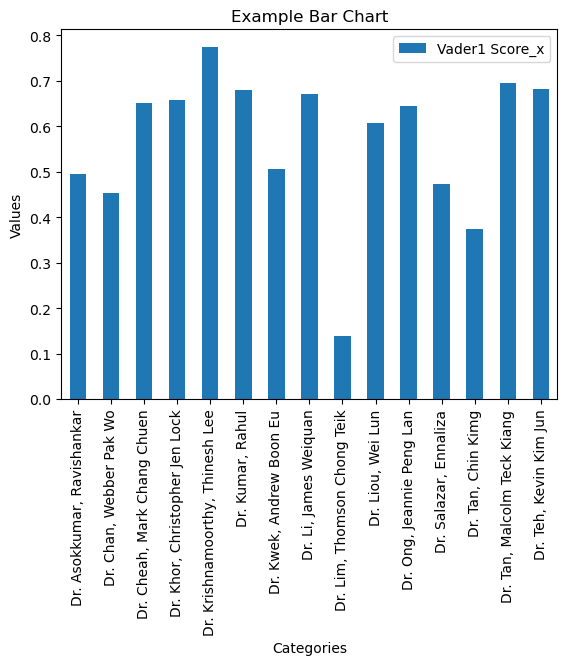

In [ ]:
test3.plot(x='Evaluator:', y='Vader1 Score_x', kind='bar')

# Set the title and axis labels
plt.title('Example Bar Chart')
plt.xlabel('Categories')
plt.ylabel('Values')

# Show the plot
plt.show()

In [ ]:
comments[['Answer:','Vader1 Score']].loc[comments['Evaluator:']=='Dr. Lim, Thomson Chong Teik']
#fucking need finetuning bro

,Answer:,Vader1 Score
21,Gabrielle is a hardworking SR who puts in extr...,0.0000
42,Resident is SR1 and is quickly learning to man...,0.0258
54,Justin is a hardworking Gastro SR that is also...,0.6705
65,Dr. Li is a hardworking SR that has the requir...,0.0000
81,Sam has all the qualities and skills expected ...,0.0000


In [ ]:
# BAR CHART BASED ON SERVICE
out3 =comments.groupby('Service:')['Vader1 Score'].mean()
out3 = out3.to_frame().reset_index()
out3

,Service:,Vader1 Score
0,- -,0.722967
1,SHS-GASTRO:ADV ENDO-CGH,0.570992
2,SHS-GASTRO:BASIC ENDO-CGH,0.267750
3,SHS-GASTRO:BASIC ENDO-SGH,0.387554
4,SHS-GASTRO:GEN GASTROHEP(ELEC)-CGH,0.641262
5,SHS-GASTRO:GEN GASTROHEP(ELEC)-SGH,0.474425
6,SHS-GASTRO:GEN GASTROHEP(ELEC)-SKH,0.633067
7,SHS-GASTRO:GEN GASTROHEP-CGH,0.629730
8,SHS-GASTRO:GEN GASTROHEP-SGH,0.497309
9,SHS-GASTRO:IBD & NUTRI-SGH,0.613626


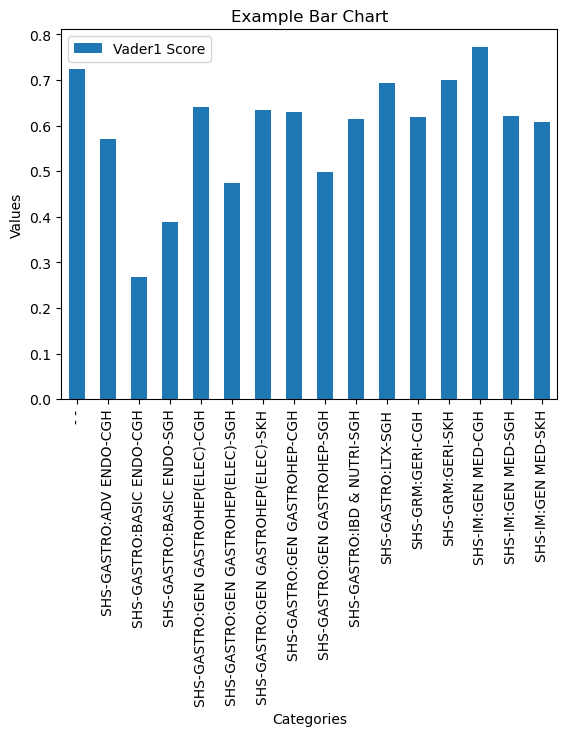

In [ ]:
out3.plot(x='Service:', y='Vader1 Score', kind='bar')

# Set the title and axis labels
plt.title('Example Bar Chart')
plt.xlabel('Categories')
plt.ylabel('Values')

# Show the plot
plt.show()

In [ ]:
comments[['Answer:']].loc[comments['Service:']=='SHS-GASTRO:BASIC ENDO-CGH'].loc[102].values.tolist()
#bro need finetuning

['Tian Ning is very competent as an SR1. She is able to identify gaps in her learning and to seek clarification when needed.']

In [ ]:
# SCATTER PLOT BETWEEN COMMENT SCORE AND ANSWER SCORE
exam_score=pd.read_excel('evaluations_overall_score.xlsx')
exam_score['Answer']=exam_score['Answer:'].apply(lambda x:int(x[0]) )
exam_score= exam_score.drop('Answer:', axis=1)


In [ ]:
comments

,Target:,Evaluator:,Rotation Dates:,Service:,Answer:,Vader1 Score,Textblob Score,Doc_Embed,Distance,Keywords
0,Eliza Chen,"Dr. Ong, Andrew Ming Liang",7/1/2022-7/31/2022,- -,Eliza Chen is starting out and therefore as ex...,0.8954,0.171429,"[[-0.6721534, -0.027664, 0.70268226, -0.476056...","[[-0.09625689, 0.11881207, 1.9541476e-05, 0.09...","[outpatient, professionalism, holistic, teacha..."
1,Eliza Chen,"Dr. Chan, Webber Pak Wo",7/1/2022-7/31/2022,SHS-GASTRO:BASIC ENDO-SGH,"As a new senior resident to gastroenterology, ...",0.2732,0.136364,"[[-0.42423996, -0.6286227, 0.88219756, -0.6787...","[[-0.0859189, 0.17790526, -0.016277257, 0.0281...","[pharmacists, medicine, inpatients, inpatient,..."
2,Eliza Chen,"Dr. Lim, Chee Hooi",7/1/2022-7/31/2022,SHS-GASTRO:BASIC ENDO-SGH,No concern,-0.2960,0.000000,"[[-0.6876688, 0.02974713, 0.109754026, 0.12074...","[[0.6711223, 0.41983747, 0.5360163, 0.5921104,...","[quiet, independently, minimal, passive, lack]"
3,Eliza Chen,"Dr. Chang, Jason Pik Eu",8/1/2022-8/31/2022,SHS-GASTRO:BASIC ENDO-SGH,Overall I would rate Eliza Chen highly as a SR...,0.8807,0.263750,"[[-0.6283155, -0.20029192, 1.1669189, -0.10387...","[[0.028535588, 0.28990865, 0.0832851, 0.186433...","[medical, doctors, healthcare, nurses, medicine]"
4,Eliza Chen,"Dr. Tan, Chee Kiat",8/1/2022-8/31/2022,SHS-GASTRO:BASIC ENDO-SGH,Eliza Chen has a quiet disposition and gives g...,0.6290,0.330000,"[[-0.8619444, -0.18374743, 0.21259235, 0.16743...","[[-0.0062184343, 0.13000053, 0.01491292, 0.150...","[caring, calm, diligent, polite, introspective]"
...,...,...,...,...,...,...,...,...,...,...
163,Rachel Yeap,"Dr. Tan, Malcolm Teck Kiang",7/1/2022-7/31/2022,SHS-GASTRO:GEN GASTROHEP-SGH,"did a week of bleeder call, good mgmt plans an...",0.3818,0.440625,"[[0.1212126, -0.52477044, 1.1620986, -0.917062...","[[-0.061233785, 0.28290597, 0.0270812, -0.0234...","[outpatient, medicine, colonoscopes, 2022, col..."
164,Rachel Yeap,"Dr. Khor, Christopher Jen Lock",8/1/2022-8/31/2022,SHS-GASTRO:GEN GASTROHEP-SGH,"very competent, extremely professional, and a ...",0.7425,0.375000,"[[-0.2288021, -0.4193769, 0.4208119, 0.1031569...","[[0.2495091, 0.22908753, 0.33462763, 0.5758852...","[professionalism, treasured, reliable, efficie..."
165,Rachel Yeap,"Dr. Liou, Wei Lun",8/1/2022-8/31/2022,SHS-GASTRO:GEN GASTROHEP-SGH,No issue. Making good progress compared to fir...,0.5423,0.475000,"[[-0.34792647, -1.0121427, 0.16201107, -1.0558...","[[0.42752415, 0.48969555, 0.44772327, 0.458115...","[maturity, completed, matures, mature, matured]"
166,Rachel Yeap,"Dr. Loo, Khang Ning",9/1/2022-10/2/2022,SHS-IM:GEN MED-SGH,Rachel is clinically competent and I can trust...,0.7184,0.000000,"[[-0.5686393, -0.43344223, 0.682797, 0.342227,...","[[-0.14905263, 0.09871096, -0.12953652, 0.0126...","[doctors, medicine, inpatient, inpatients, nur..."


In [ ]:
score_comments=pd.merge(comments,exam_score, on = ['Target:','Evaluator:','Rotation Dates:','Service:'], how='left')


<AxesSubplot:xlabel='Answer', ylabel='Density'>

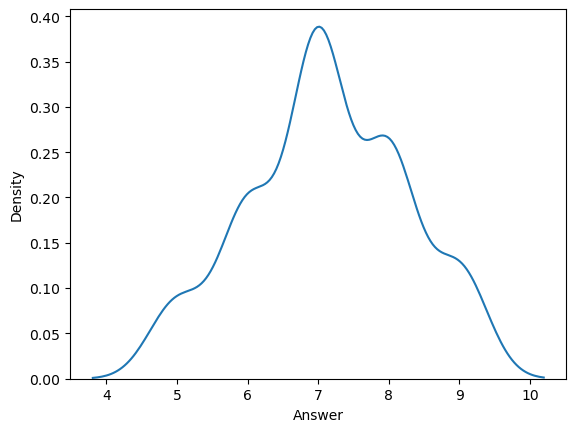

In [ ]:
import seaborn as sns
sns.kdeplot(score_comments['Answer'])

<AxesSubplot:xlabel='Vader1 Score', ylabel='Density'>

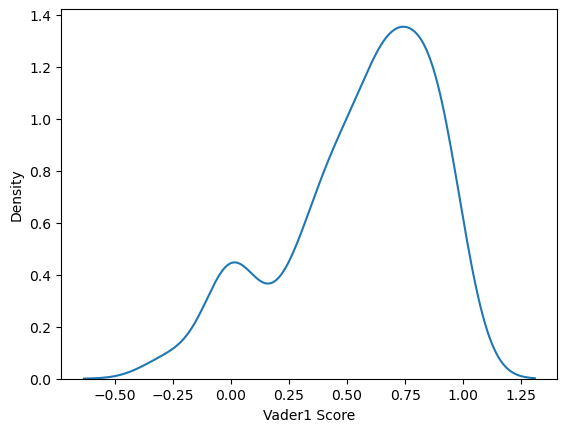

In [ ]:
sns.kdeplot(score_comments['Vader1 Score'])

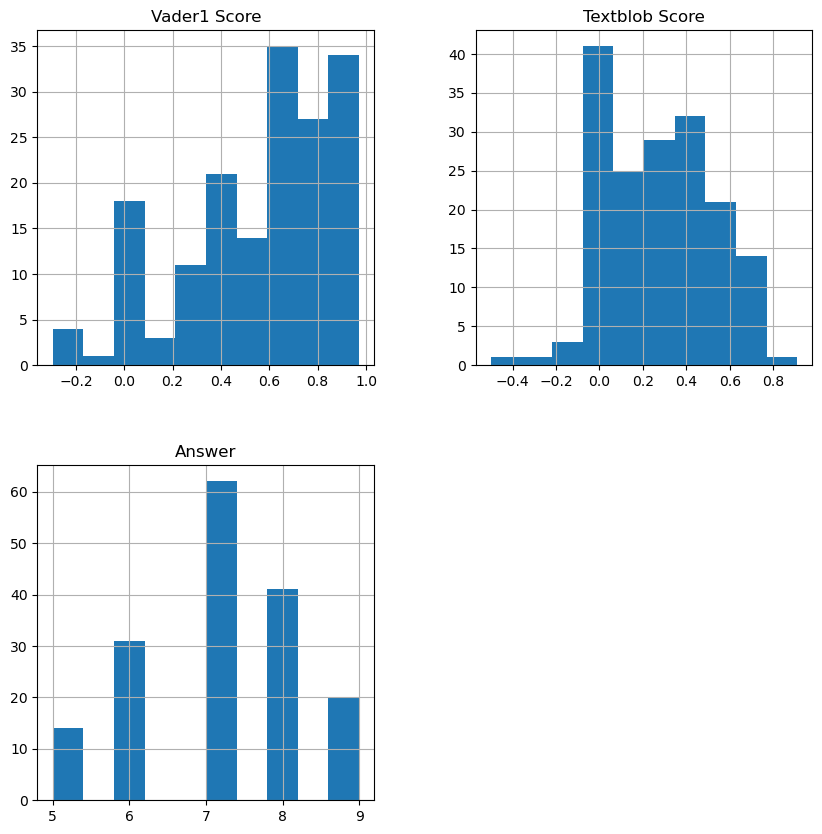

In [ ]:
score_comments.hist(figsize=[10,10])
plt.show()

In [ ]:
score_comments

,Target:,Evaluator:,Rotation Dates:,Service:,Answer:,Vader1 Score,Textblob Score,Doc_Embed,Distance,Keywords,Answer
0,Eliza Chen,"Dr. Ong, Andrew Ming Liang",7/1/2022-7/31/2022,- -,Eliza Chen is starting out and therefore as ex...,0.8954,0.171429,"[[-0.6721534, -0.027664, 0.70268226, -0.476056...","[[-0.09625689, 0.11881207, 1.9541476e-05, 0.09...","[outpatient, professionalism, holistic, teacha...",5
1,Eliza Chen,"Dr. Chan, Webber Pak Wo",7/1/2022-7/31/2022,SHS-GASTRO:BASIC ENDO-SGH,"As a new senior resident to gastroenterology, ...",0.2732,0.136364,"[[-0.42423996, -0.6286227, 0.88219756, -0.6787...","[[-0.0859189, 0.17790526, -0.016277257, 0.0281...","[pharmacists, medicine, inpatients, inpatient,...",7
2,Eliza Chen,"Dr. Lim, Chee Hooi",7/1/2022-7/31/2022,SHS-GASTRO:BASIC ENDO-SGH,No concern,-0.2960,0.000000,"[[-0.6876688, 0.02974713, 0.109754026, 0.12074...","[[0.6711223, 0.41983747, 0.5360163, 0.5921104,...","[quiet, independently, minimal, passive, lack]",5
3,Eliza Chen,"Dr. Chang, Jason Pik Eu",8/1/2022-8/31/2022,SHS-GASTRO:BASIC ENDO-SGH,Overall I would rate Eliza Chen highly as a SR...,0.8807,0.263750,"[[-0.6283155, -0.20029192, 1.1669189, -0.10387...","[[0.028535588, 0.28990865, 0.0832851, 0.186433...","[medical, doctors, healthcare, nurses, medicine]",7
4,Eliza Chen,"Dr. Tan, Chee Kiat",8/1/2022-8/31/2022,SHS-GASTRO:BASIC ENDO-SGH,Eliza Chen has a quiet disposition and gives g...,0.6290,0.330000,"[[-0.8619444, -0.18374743, 0.21259235, 0.16743...","[[-0.0062184343, 0.13000053, 0.01491292, 0.150...","[caring, calm, diligent, polite, introspective]",5
...,...,...,...,...,...,...,...,...,...,...,...
163,Rachel Yeap,"Dr. Tan, Malcolm Teck Kiang",7/1/2022-7/31/2022,SHS-GASTRO:GEN GASTROHEP-SGH,"did a week of bleeder call, good mgmt plans an...",0.3818,0.440625,"[[0.1212126, -0.52477044, 1.1620986, -0.917062...","[[-0.061233785, 0.28290597, 0.0270812, -0.0234...","[outpatient, medicine, colonoscopes, 2022, col...",8
164,Rachel Yeap,"Dr. Khor, Christopher Jen Lock",8/1/2022-8/31/2022,SHS-GASTRO:GEN GASTROHEP-SGH,"very competent, extremely professional, and a ...",0.7425,0.375000,"[[-0.2288021, -0.4193769, 0.4208119, 0.1031569...","[[0.2495091, 0.22908753, 0.33462763, 0.5758852...","[professionalism, treasured, reliable, efficie...",7
165,Rachel Yeap,"Dr. Liou, Wei Lun",8/1/2022-8/31/2022,SHS-GASTRO:GEN GASTROHEP-SGH,No issue. Making good progress compared to fir...,0.5423,0.475000,"[[-0.34792647, -1.0121427, 0.16201107, -1.0558...","[[0.42752415, 0.48969555, 0.44772327, 0.458115...","[maturity, completed, matures, mature, matured]",8
166,Rachel Yeap,"Dr. Loo, Khang Ning",9/1/2022-10/2/2022,SHS-IM:GEN MED-SGH,Rachel is clinically competent and I can trust...,0.7184,0.000000,"[[-0.5686393, -0.43344223, 0.682797, 0.342227,...","[[-0.14905263, 0.09871096, -0.12953652, 0.0126...","[doctors, medicine, inpatient, inpatients, nur...",7


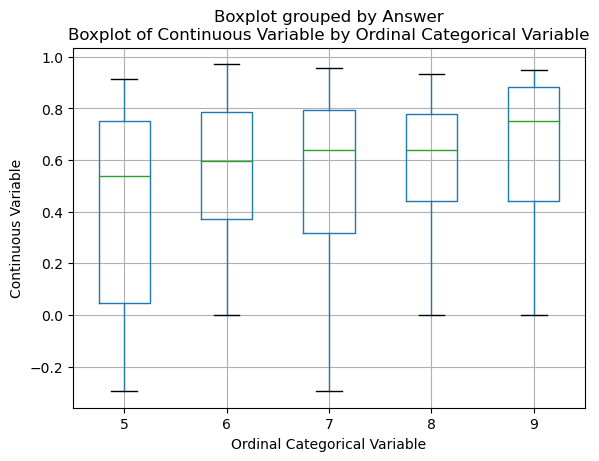

In [ ]:
# Create a boxplot
score_comments.boxplot(column='Vader1 Score', by='Answer')

# Set the axis labels and title
plt.xlabel('Ordinal Categorical Variable')
plt.ylabel('Continuous Variable')
plt.title('Boxplot of Continuous Variable by Ordinal Categorical Variable')

# Show the plot
plt.show()

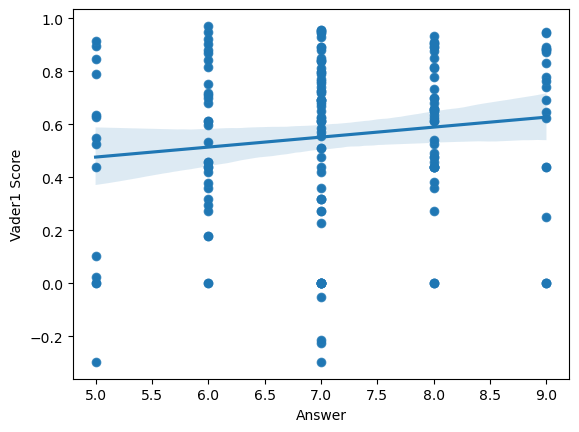

In [ ]:

# Create a scatter plot using seaborn
sns.scatterplot(y='Vader1 Score', x='Answer', data=score_comments)

# Add a best fit line to the scatter plot
sns.regplot(y='Vader1 Score', x='Answer', data=score_comments)

# Display the plot
plt.show()

In [ ]:
import pandas as pd
comments=pd.read_excel('evaluations_overall_comments.xlsx')
comments

,Target:,Evaluator:,Rotation Dates:,Service:,Answer:
0,Eliza Chen,"Dr. Ong, Andrew Ming Liang",7/1/2022-7/31/2022,- -,Eliza Chen is starting out and therefore as ex...
1,Eliza Chen,"Dr. Chan, Webber Pak Wo",7/1/2022-7/31/2022,SHS-GASTRO:BASIC ENDO-SGH,"As a new senior resident to gastroenterology, ..."
2,Eliza Chen,"Dr. Lim, Chee Hooi",7/1/2022-7/31/2022,SHS-GASTRO:BASIC ENDO-SGH,No concern
3,Eliza Chen,"Dr. Chang, Jason Pik Eu",8/1/2022-8/31/2022,SHS-GASTRO:BASIC ENDO-SGH,Overall I would rate Eliza Chen highly as a SR...
4,Eliza Chen,"Dr. Tan, Chee Kiat",8/1/2022-8/31/2022,SHS-GASTRO:BASIC ENDO-SGH,Eliza Chen has a quiet disposition and gives g...
...,...,...,...,...,...
163,Rachel Yeap,"Dr. Tan, Malcolm Teck Kiang",7/1/2022-7/31/2022,SHS-GASTRO:GEN GASTROHEP-SGH,"did a week of bleeder call, good mgmt plans an..."
164,Rachel Yeap,"Dr. Khor, Christopher Jen Lock",8/1/2022-8/31/2022,SHS-GASTRO:GEN GASTROHEP-SGH,"very competent, extremely professional, and a ..."
165,Rachel Yeap,"Dr. Liou, Wei Lun",8/1/2022-8/31/2022,SHS-GASTRO:GEN GASTROHEP-SGH,No issue. Making good progress compared to fir...
166,Rachel Yeap,"Dr. Loo, Khang Ning",9/1/2022-10/2/2022,SHS-IM:GEN MED-SGH,Rachel is clinically competent and I can trust...


In [ ]:
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
import numpy as np
from scipy.special import softmax
import csv
import urllib.request

# Preprocess text (username and link placeholders)
def preprocess(text):
    new_text = []
 
 
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)

# Tasks:
# emoji, emotion, hate, irony, offensive, sentiment
# stance/abortion, stance/atheism, stance/climate, stance/feminist, stance/hillary

task='sentiment'
MODEL = f"cardiffnlp/twitter-roberta-base-{task}"

tokenizer = AutoTokenizer.from_pretrained(MODEL)

# download label mapping
labels=[]
mapping_link = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/{task}/mapping.txt"
with urllib.request.urlopen(mapping_link) as f:
    html = f.read().decode('utf-8').split("\n")
    csvreader = csv.reader(html, delimiter='\t')
labels = [row[1] for row in csvreader if len(row) > 1]

# PT
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
model.save_pretrained(MODEL)

comments['processed']=comments['Answer:'].apply(lambda x: preprocess(x))
comments['encoded']=comments['processed'].apply(lambda x:tokenizer(x,return_tensors='pt'))
comments['output']=comments['encoded'].apply(lambda x:model(**x))
comments['scores']=comments['output'].apply(lambda x:softmax(x[0][0].detach().numpy()))
print(comments)



KeyboardInterrupt: 

In [ ]:
import torch
from sklearn.metrics import accuracy_score
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from datasets import load_dataset
from torch.nn.utils.rnn import pad_sequence

# # Load tokenizer and model
# model_name = "cardiffnlp/twitter-roberta-base-sentiment"
# tokenizer = AutoTokenizer.from_pretrained(model_name)
# model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Load and preprocess data
dataset = load_dataset("imdb")
train_dataset = dataset["train"].map(lambda example: {"text": example["text"], "label": example["label"]})
val_dataset = dataset["test"].map(lambda example: {"text": example["text"], "label": example["label"]})

def preprocess_function(examples):
    return tokenizer(examples["text"], padding=True, truncation=True,max_length=300)

train_dataset = train_dataset.map(preprocess_function, batched=True)
val_dataset = val_dataset.map(preprocess_function, batched=True)

train_dataset.set_format("torch", columns=["input_ids", "attention_mask", "label"])
val_dataset.set_format("torch", columns=["input_ids", "attention_mask", "label"])

# Define training arguments and trainer
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=3,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=100,
    evaluation_strategy="no",
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    save_strategy = 'no'
)

def compute_accuracy(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    return accuracy_score(labels, preds)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_accuracy
)

# Train model
trainer.train()

TypeError: Descriptors cannot not be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

In [ ]:
from datasets import load_dataset
from torch.nn.utils.rnn import pad_sequence

raw_datasets = load_dataset("imdb")
from transformers import AutoTokenizer

# tokenizer = AutoTokenizer.from_pretrained(MODEL)
inputs = tokenizer(sentences, padding="max_length", truncation=True)
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)

tokenized_datasets = raw_datasets.map(tokenize_function, batched=True)

small_train_dataset = tokenized_datasets["train"].shuffle(seed=42).select(range(1000)) 
small_eval_dataset = tokenized_datasets["test"].shuffle(seed=42).select(range(1000)) 
padded_train_dataset = pad_sequence(small_train_dataset, batch_first=True)
padded_eval_dataset = pad_sequence(small_eval_dataset, batch_first=True)

full_train_dataset = tokenized_datasets["train"]
full_eval_dataset = tokenized_datasets["test"]

# from transformers import AutoModelForSequenceClassification

# model = AutoModelForSequenceClassification.from_pretrained("bert-base-cased", num_labels=2)
from transformers import TrainingArguments

training_args = TrainingArguments("test_trainer")
from transformers import Trainer

trainer = Trainer(
    model=model, args=training_args, train_dataset=small_train_dataset, eval_dataset=small_eval_dataset
)

trainer.train()

import numpy as np
from datasets import load_metric

metric = load_metric("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=small_train_dataset,
    eval_dataset=small_eval_dataset,
    compute_metrics=compute_metrics,
)
trainer.evaluate()


  0%|          | 0/3 [00:00<?, ?it/s]

TypeError: expected Tensor as element 0 in argument 0, but got dict

In [ ]:
from datasets import load_dataset

dataset = load_dataset("yelp_review_full")
dataset["train"][100]

from transformers import AutoTokenizer

def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)


tokenized_datasets = dataset.map(tokenize_function, batched=True)

tokenized_datasets = tokenized_datasets.remove_columns(["text"])

tokenized_datasets = tokenized_datasets.rename_column("label", "labels")

tokenized_datasets.set_format("torch")

small_train_dataset = tokenized_datasets["train"].shuffle(seed=42).select(range(1000))
small_eval_dataset = tokenized_datasets["test"].shuffle(seed=42).select(range(1000))

from torch.utils.data import DataLoader

train_dataloader = DataLoader(small_train_dataset, shuffle=True, batch_size=8)
eval_dataloader = DataLoader(small_eval_dataset, batch_size=8)

from transformers import AutoModelForSequenceClassification


from torch.optim import AdamW

optimizer = AdamW(model.parameters(), lr=5e-5)

from transformers import get_scheduler

num_epochs = 3
num_training_steps = num_epochs * len(train_dataloader)
lr_scheduler = get_scheduler(
    name="linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps
)

import torch

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)

from tqdm.auto import tqdm

progress_bar = tqdm(range(num_training_steps))

model.train()
for epoch in range(num_epochs):
    for batch in train_dataloader:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss
        loss.backward()

        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()
        progress_bar.update(1)

Generating train split:   0%|          | 0/650000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset yelp_review_full downloaded and prepared to C:/Users/WongQiHuiYve/.cache/huggingface/datasets/yelp_review_full/yelp_review_full/1.0.0/e8e18e19d7be9e75642fc66b198abadb116f73599ec89a69ba5dd8d1e57ba0bf. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

Map:   0%|          | 0/650000 [00:00<?, ? examples/s]

Asking to pad to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no padding.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

  0%|          | 0/375 [00:00<?, ?it/s]

RuntimeError: stack expects each tensor to be equal size, but got [129] at entry 0 and [135] at entry 1

In [ ]:
import evaluate

metric = evaluate.load("accuracy")
model.eval()
for batch in eval_dataloader:
    batch = {k: v.to(device) for k, v in batch.items()}
    with torch.no_grad():
        outputs = model(**batch)

    logits = outputs.logits
    predictions = torch.argmax(logits, dim=-1)
    metric.add_batch(predictions=predictions, references=batch["labels"])

metric.compute()

In [ ]:
small_train_dataset 

Dataset({
    features: ['text', 'label', 'input_ids', 'attention_mask'],
    num_rows: 1000
})

In [ ]:

comments['output2']=comments['encoded'].apply(lambda x:model(**x))
comments['scores2']=comments['output2'].apply(lambda x:softmax(x[0][0].detach().numpy()))
print(comments)

         Target:                      Evaluator:       Rotation Dates:  \
0     Eliza Chen      Dr. Ong, Andrew Ming Liang    7/1/2022-7/31/2022   
1     Eliza Chen         Dr. Chan, Webber Pak Wo    7/1/2022-7/31/2022   
2     Eliza Chen              Dr. Lim, Chee Hooi    7/1/2022-7/31/2022   
3     Eliza Chen         Dr. Chang, Jason Pik Eu    8/1/2022-8/31/2022   
4     Eliza Chen              Dr. Tan, Chee Kiat    8/1/2022-8/31/2022   
..           ...                             ...                   ...   
163  Rachel Yeap     Dr. Tan, Malcolm Teck Kiang    7/1/2022-7/31/2022   
164  Rachel Yeap  Dr. Khor, Christopher Jen Lock    8/1/2022-8/31/2022   
165  Rachel Yeap               Dr. Liou, Wei Lun    8/1/2022-8/31/2022   
166  Rachel Yeap             Dr. Loo, Khang Ning    9/1/2022-10/2/2022   
167  Rachel Yeap        Dr. Kwek, Andrew Boon Eu  10/3/2022-10/31/2022   

                         Service:  \
0                             - -   
1       SHS-GASTRO:BASIC ENDO-SGH   


In [ ]:
comments['neu']=comments['scores'].apply(lambda x: x[1])
comments[['Answer:','neu']].loc[comments['neu']>0.7]

,Answer:,neu
2,No concern,0.744895
5,Please see comments above,0.864153
18,No concern,0.744895
20,able to act independently in most of the clini...,0.840395
50,Able to work almost independently.n,0.704185
56,"Keen to learn, follows through on tasks, techn...",0.769361
89,Knowledge aspect needs further improvement,0.700757
113,As per earlier comments,0.849452
122,We had discussed previously about Andre's 5 pe...,0.742418
124,Andre would need to show more dedication to le...,0.708658


In [ ]:
comments['neg']=comments['scores'].apply(lambda x: x[0])
comments[['Answer:','neg']].loc[comments['neg']>0.3].values.tolist()

[['Xiuhuan cares for her patients and that\'s evident from how she greets them as people when doing the round (as opposed to patients). However she needs to apply herself more. Although she is gaining the skills and knowledge requisite of her level, she needs to remember that she is training to be a consultant and not a SR. She sometimes "hedges" her diagnosis and this approach will make her less effective in the long run.',
  0.4184384047985077],
 ['enthusiastic but sometimes may lost focus', 0.37071284651756287],
 ['I think overall whilst Andre is not a malignant person, he requires supervision to complete his tasks. With regards to his leave practices, to give him the benefit of the doubt, he "might not have known" and he certainly has needs for his family, however the lack of consideration on the impact of his own learning, and the impact this has on others having to cover him for weekends and ward duties is of concern.',
  0.47441616654396057],
 ['I have not written much in this a

In [ ]:
comments['pos']=comments['scores'].apply(lambda x: x[2])
comments[['Answer:','pos']].loc[comments['pos']<0.2].values.tolist()

KeyError: 'scores'

In [ ]:

comments[['Answer:','scores']]

,Answer:,scores
0,Eliza Chen is starting out and therefore as ex...,"[0.012829757, 0.21647434, 0.7706959]"
1,"As a new senior resident to gastroenterology, ...","[0.0025204902, 0.059670344, 0.9378091]"
2,No concern,"[0.17661668, 0.74489474, 0.0784886]"
3,Overall I would rate Eliza Chen highly as a SR...,"[0.010495567, 0.1125953, 0.8769091]"
4,Eliza Chen has a quiet disposition and gives g...,"[0.18982491, 0.6115974, 0.19857769]"
...,...,...
163,"did a week of bleeder call, good mgmt plans an...","[0.07528579, 0.526805, 0.3979092]"
164,"very competent, extremely professional, and a ...","[0.002622035, 0.022788968, 0.974589]"
165,No issue. Making good progress compared to fir...,"[0.0041091316, 0.06917517, 0.9267157]"
166,Rachel is clinically competent and I can trust...,"[0.010198248, 0.18377367, 0.80602807]"


======================================================== CLUSTERING STARTS HERE =======================================================

In [ ]:
# year of training (Personal Details)
# compliance (Didactic Attendance)
# comment score (Evaluation)
# answer score (Evaluation)
# procedure (Procedure Log)

In [ ]:
personal=pd.read_excel('personal_details.xlsx')
eval_scores=pd.read_excel('evaluations_overall_score.xlsx')
didactic=pd.read_excel('didactic_attendance.xlsx')
# comments used from above

In [ ]:
exam_score_groupby=exam_score.groupby('Target:')['Answer'].mean()
exam_score_groupby=exam_score_groupby.to_frame()
didactic_groupby=didactic.groupby('Target:')['% Compliance'].mean()
didactic_groupby=didactic_groupby.to_frame()
comments_groupby=comments.groupby('Target:')['pos'].mean()
comments_groupby=comments_groupby.to_frame()
cluster_df=comments_groupby.merge(exam_score_groupby,how='inner',on='Target:').merge(didactic_groupby,how='inner',on='Target:')
cluster_df.index
# cluster_df.to_excel('cluster_df.xlsx')

KeyError: 'Column not found: pos'

In [ ]:
comments

,Target:,Evaluator:,Rotation Dates:,Service:,Answer:,processed,encoded,output,scores,output2,scores2,neu,neg,pos
0,Eliza Chen,"Dr. Ong, Andrew Ming Liang",7/1/2022-7/31/2022,- -,Eliza Chen is starting out and therefore as ex...,Eliza Chen is starting out and therefore as ex...,"[input_ids, attention_mask]","{'logits': [[tensor(-2.3454, grad_fn=<UnbindBa...","[0.012829757, 0.21647434, 0.7706959]","{'logits': [[tensor(-2.3454, grad_fn=<UnbindBa...","[0.012829757, 0.21647434, 0.7706959]",0.216474,0.012830,0.770696
1,Eliza Chen,"Dr. Chan, Webber Pak Wo",7/1/2022-7/31/2022,SHS-GASTRO:BASIC ENDO-SGH,"As a new senior resident to gastroenterology, ...","As a new senior resident to gastroenterology, ...","[input_ids, attention_mask]","{'logits': [[tensor(-2.9243, grad_fn=<UnbindBa...","[0.0025204902, 0.059670344, 0.9378091]","{'logits': [[tensor(-2.9243, grad_fn=<UnbindBa...","[0.0025204902, 0.059670344, 0.9378091]",0.059670,0.002520,0.937809
2,Eliza Chen,"Dr. Lim, Chee Hooi",7/1/2022-7/31/2022,SHS-GASTRO:BASIC ENDO-SGH,No concern,No concern,"[input_ids, attention_mask]","{'logits': [[tensor(-0.1904, grad_fn=<UnbindBa...","[0.17661668, 0.74489474, 0.0784886]","{'logits': [[tensor(-0.1904, grad_fn=<UnbindBa...","[0.17661668, 0.74489474, 0.0784886]",0.744895,0.176617,0.078489
3,Eliza Chen,"Dr. Chang, Jason Pik Eu",8/1/2022-8/31/2022,SHS-GASTRO:BASIC ENDO-SGH,Overall I would rate Eliza Chen highly as a SR...,Overall I would rate Eliza Chen highly as a SR...,"[input_ids, attention_mask]","{'logits': [[tensor(-2.1626, grad_fn=<UnbindBa...","[0.010495567, 0.1125953, 0.8769091]","{'logits': [[tensor(-2.1626, grad_fn=<UnbindBa...","[0.010495567, 0.1125953, 0.8769091]",0.112595,0.010496,0.876909
4,Eliza Chen,"Dr. Tan, Chee Kiat",8/1/2022-8/31/2022,SHS-GASTRO:BASIC ENDO-SGH,Eliza Chen has a quiet disposition and gives g...,Eliza Chen has a quiet disposition and gives g...,"[input_ids, attention_mask]","{'logits': [[tensor(-0.4185, grad_fn=<UnbindBa...","[0.18982491, 0.6115974, 0.19857769]","{'logits': [[tensor(-0.4185, grad_fn=<UnbindBa...","[0.18982491, 0.6115974, 0.19857769]",0.611597,0.189825,0.198578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,Rachel Yeap,"Dr. Tan, Malcolm Teck Kiang",7/1/2022-7/31/2022,SHS-GASTRO:GEN GASTROHEP-SGH,"did a week of bleeder call, good mgmt plans an...","did a week of bleeder call, good mgmt plans an...","[input_ids, attention_mask]","{'logits': [[tensor(-1.2227, grad_fn=<UnbindBa...","[0.07528579, 0.526805, 0.3979092]","{'logits': [[tensor(-1.2227, grad_fn=<UnbindBa...","[0.07528579, 0.526805, 0.3979092]",0.526805,0.075286,0.397909
164,Rachel Yeap,"Dr. Khor, Christopher Jen Lock",8/1/2022-8/31/2022,SHS-GASTRO:GEN GASTROHEP-SGH,"very competent, extremely professional, and a ...","very competent, extremely professional, and a ...","[input_ids, attention_mask]","{'logits': [[tensor(-2.4629, grad_fn=<UnbindBa...","[0.002622035, 0.022788968, 0.974589]","{'logits': [[tensor(-2.4629, grad_fn=<UnbindBa...","[0.002622035, 0.022788968, 0.974589]",0.022789,0.002622,0.974589
165,Rachel Yeap,"Dr. Liou, Wei Lun",8/1/2022-8/31/2022,SHS-GASTRO:GEN GASTROHEP-SGH,No issue. Making good progress compared to fir...,No issue. Making good progress compared to fir...,"[input_ids, attention_mask]","{'logits': [[tensor(-2.6766, grad_fn=<UnbindBa...","[0.0041091316, 0.06917517, 0.9267157]","{'logits': [[tensor(-2.6766, grad_fn=<UnbindBa...","[0.0041091316, 0.06917517, 0.9267157]",0.069175,0.004109,0.926716
166,Rachel Yeap,"Dr. Loo, Khang Ning",9/1/2022-10/2/2022,SHS-IM:GEN MED-SGH,Rachel is clinically competent and I can trust...,Rachel is clinically competent and I can trust...,"[input_ids, attention_mask]","{'logits': [[tensor(-2.3950, grad_fn=<UnbindBa...","[0.010198248, 0.18377367, 0.80602807]","{'logits': [[tensor(-2.3950, grad_fn=<UnbindBa...","[0.010198248, 0.18377367, 0.80602807]",0.183774,0.010198,0.806028


In [ ]:
cluster_df=pd.read_excel('cluster_df.xlsx')
cluster_df=cluster_df.set_index('Target:')
cluster_personal_df=pd.merge(cluster_df, personal, left_on='Target:', right_on='Staff Name')
cluster_personal_df=cluster_personal_df[['pos','Answer','% Compliance','Procedures','Staff Name','Year of Training']]
cluster_personal_df
cluster_personal_df = pd.get_dummies(cluster_personal_df, columns=["Year of Training"])
cluster_personal_df=cluster_personal_df.set_index('Staff Name')
cluster_personal_df

,pos,Answer,% Compliance,Procedures,Year of Training_SR1,Year of Training_SR2,Year of Training_SR3
Staff Name,,,,,,,
Amanda Koh,0.702590,6.363636,0.795635,91,1,0,0
Andre Tan,0.627803,6.250000,0.831349,608,0,0,1
Christopher Tan,0.742413,8.750000,0.819444,612,0,0,1
Eliza Chen,0.618651,6.200000,0.924603,35,1,0,0
Francisco Tan,0.782295,7.250000,0.928571,651,0,1,0
Gabrielle Ho,0.642040,7.000000,0.805556,149,0,1,0
James Wang,0.657804,5.857143,0.888889,63,1,0,0
Jiang Xiao Ye,0.738620,7.625000,0.851190,522,0,1,0
Justin Bieber,0.711947,7.375000,0.865079,544,0,1,0


<AxesSubplot:>

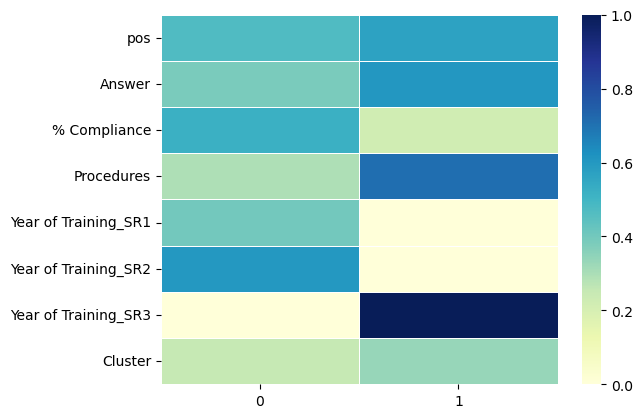

In [ ]:
# CLUSTERING 
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = MinMaxScaler()
df2=scaler.fit_transform(cluster_personal_df)
from sklearn.cluster import KMeans
model_5 = KMeans(n_clusters = 2, random_state=0)
type(model_5)
model_5.fit(df2)
model_5.cluster_centers_
clust_means = pd.DataFrame(model_5.cluster_centers_, columns=cluster_personal_df.columns)
clust_means.T
import seaborn as sns
sns.heatmap(clust_means.T,  linewidths=.5, cmap="YlGnBu")

In [ ]:
sse = pd.Series(range(14),index = range(1,15))

for i in range(1,15):
    model = KMeans(n_clusters = i, random_state=0)
    model.fit(cluster_personal_df)
    sse[i] = model.inertia_
print(sse)
plt.plot(sse.index, sse, linewidth=2.0)

c:\Users\WongQiHuiYve\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


1     1.420758e+06
2     3.039082e+05
3     1.112465e+05
4     5.198373e+04
5     3.294156e+04
6     2.117648e+04
7     1.095187e+04
8     4.277525e+03
9     2.870761e+03
10    1.694676e+03
11    1.009072e+03
12    6.170114e+02
13    2.788739e+02
14    3.684224e+01
dtype: float64


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage

agg_clustering = AgglomerativeClustering(n_clusters=2)
agg_clustering.fit(cluster_personal_df)

print("Cluster labels:\n", agg_clustering.labels_)

Cluster labels:
 [1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0]


Cluster labels:  [1 0 0 1 0 1 1 0 0 2 2 0 1 0 0 0]
              pos    Answer  % Compliance  Procedures  Year of Training_SR1  \
Cluster                                                                       
0        0.721305  7.524691      0.874135  593.777778              0.111111   
1        0.682595  6.584156      0.853968  102.600000              0.600000   
2        0.706168  7.362637      0.808303  969.500000              0.000000   

         Year of Training_SR2  Year of Training_SR3  
Cluster                                              
0                    0.444444              0.444444  
1                    0.400000              0.000000  
2                    0.000000              1.000000  


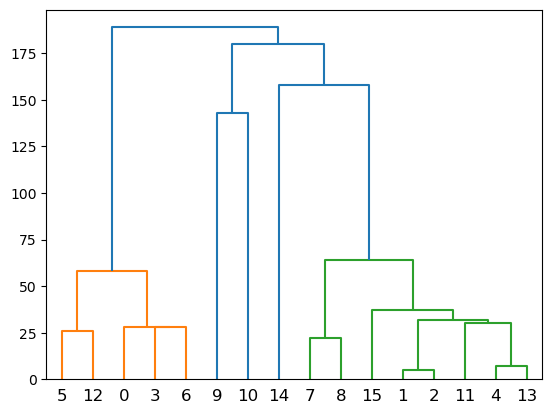

In [ ]:

# Calculate pairwise distances between the data points
distances = pdist(cluster_personal_df)

# Perform hierarchical clustering
linkage_matrix = linkage(distances)

# Visualize the dendrogram
dendrogram(linkage_matrix)

# Create clusters based on the dendrogram
num_clusters = 3
cluster_labels = AgglomerativeClustering(n_clusters=num_clusters).fit_predict(cluster_personal_df)

# Add the cluster labels to the dataframe
cluster_personal_df['Cluster'] = cluster_labels

# Calculate the mean values for each variable within each cluster
cluster_means = cluster_personal_df.groupby('Cluster').mean()

# Print the mean values for each cluster
print(cluster_means)

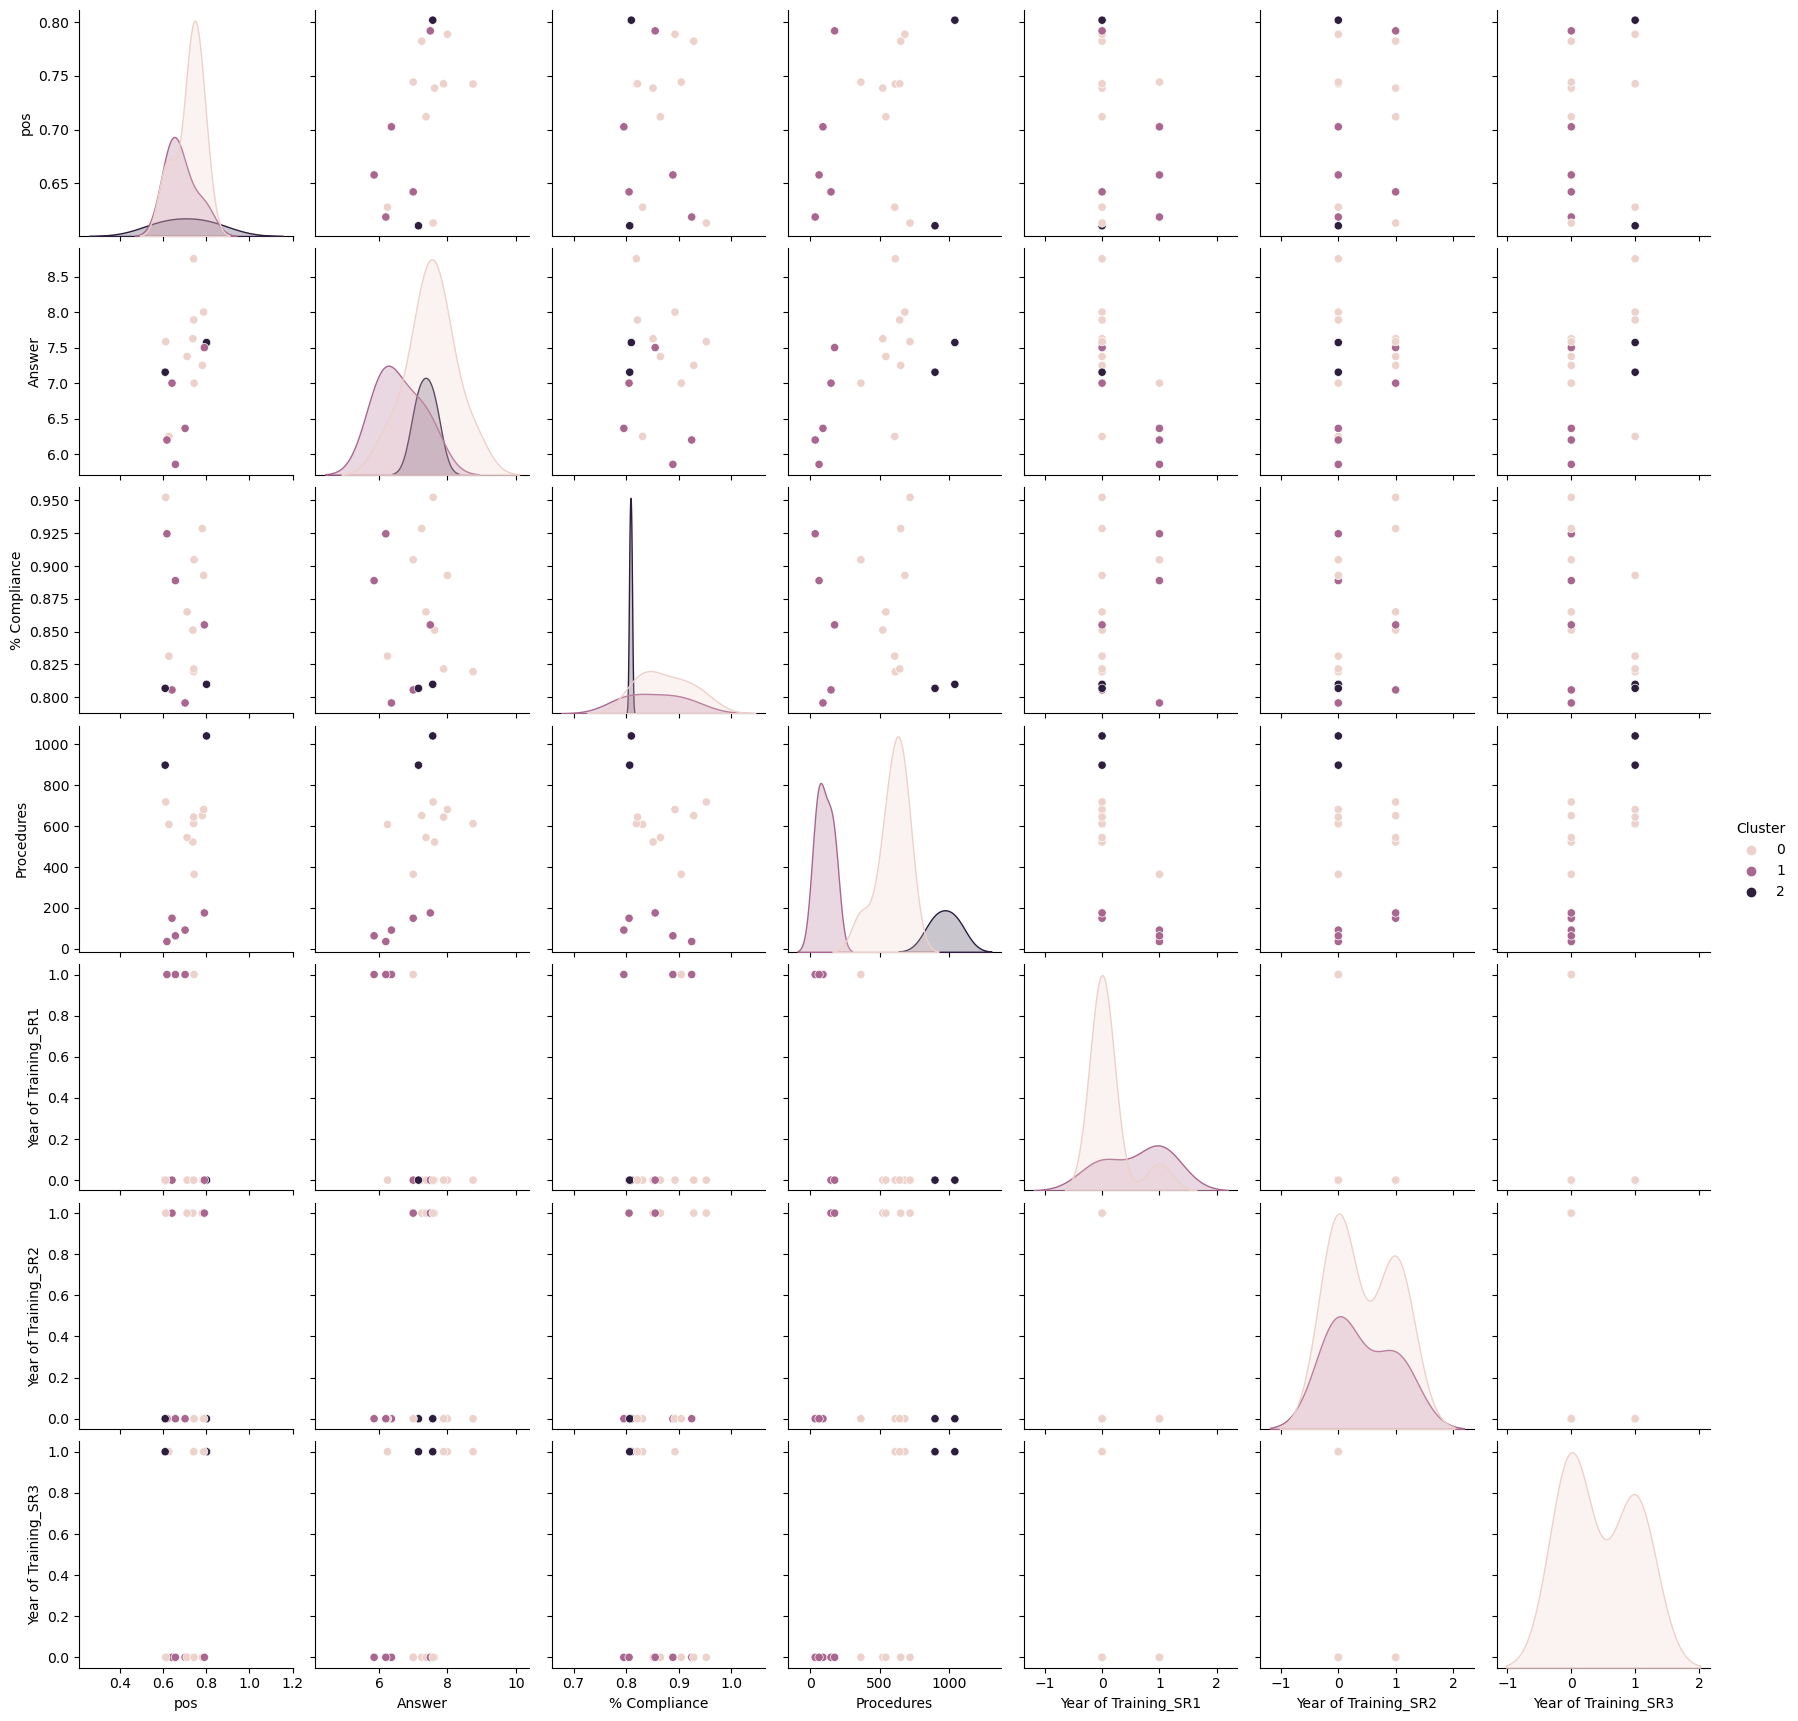

In [ ]:
sns.pairplot(cluster_personal_df, hue='Cluster')

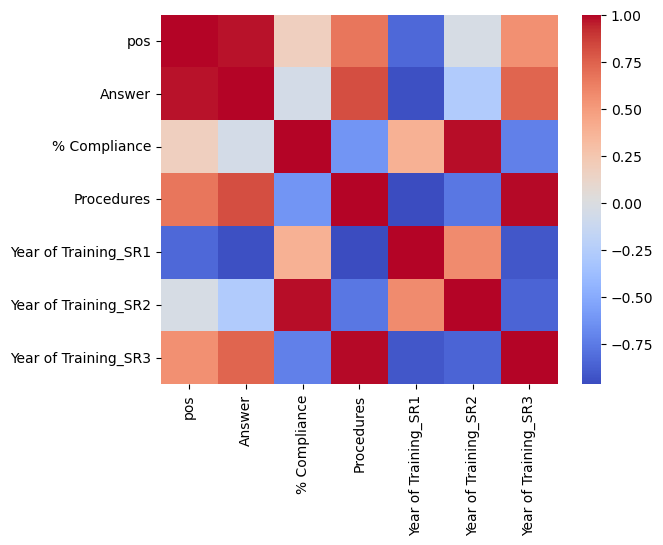

In [ ]:
sns.heatmap(cluster_means.corr(), cmap='coolwarm')
plt.show()

In [ ]:
specific_procedures=pd.read_excel('procedures.xlsx')
specific_procedures=specific_procedures.T
specific_procedures=specific_procedures.fillna(0)
specific_procedures.columns=specific_procedures.iloc[0]
specific_procedures=specific_procedures[1:]
# specific_procedures=specific_procedures.reset_index()
specific_procedures=specific_procedures[['Gastroscopy (OGD) with biopsy','Colonoscopy with biopsy','Colonoscopy']]
specific_procedures

Unnamed: 0,Gastroscopy (OGD) with biopsy,Colonoscopy with biopsy,Colonoscopy
Jiang Xiao Ye,334.0,38.0,5.0
Gabrielle Ho,101.0,0,2.0
Eliza Chen,14.0,0,0
Kang Hyun Bin,426.0,33.0,191.0
Amanda Koh,21.0,0,0
Justin Bieber,252.0,121.0,0
Li Xiuhuan,12.0,8.0,66.0
Sam Lim,207.0,35.0,0
Pei Wei Ping,302.0,104.0,30.0
Qiu Tian Ning,28.0,0,0


<AxesSubplot:ylabel='Unnamed: 0'>

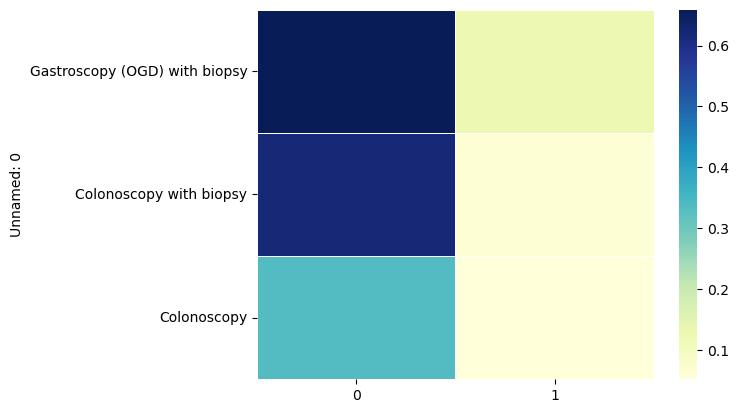

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = MinMaxScaler()
specific_procedures2=scaler.fit_transform(specific_procedures)
from sklearn.cluster import KMeans
model_4 = KMeans(n_clusters =2, random_state=0)
model_4.fit(specific_procedures2)
model_4.cluster_centers_
clust_means = pd.DataFrame(model_4.cluster_centers_, columns=specific_procedures.columns)
clust_means.T
import seaborn as sns
sns.heatmap(clust_means.T,  linewidths=.5, cmap="YlGnBu")

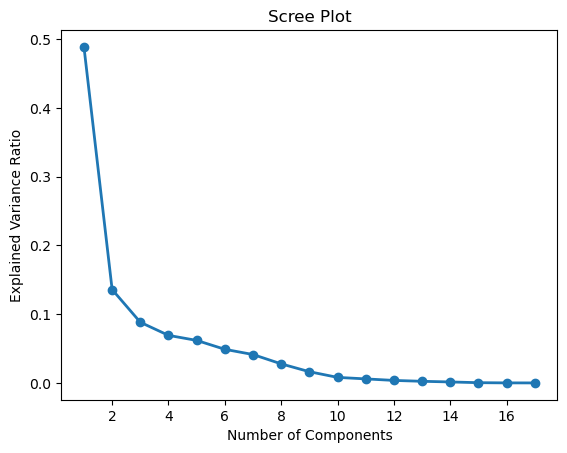

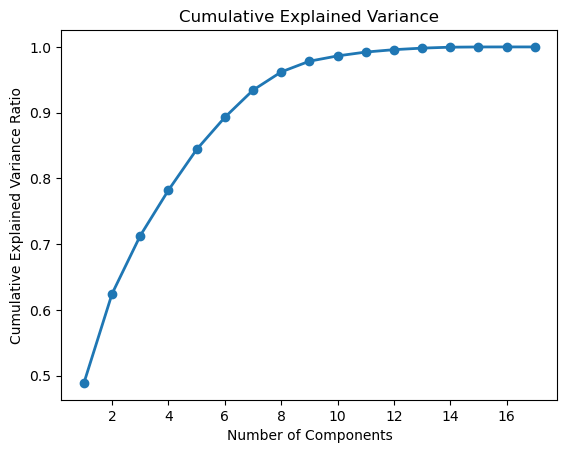

In [ ]:
from sklearn.decomposition import PCA
# Perform PCA and extract explained variance
pca = PCA()
pca.fit(specific_procedures2)
explained_var = pca.explained_variance_ratio_


# Generate scree plot
plt.plot(range(1, len(explained_var)+1), explained_var, 'o-', linewidth=2)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

# Calculate cumulative explained variance
# cumulative_var = np.cumsum(explained_var)
# plt.plot(range(1, len(cumulative_var)+1), cumulative_var, 'o-', linewidth=2)
# plt.xlabel('Number of Components')
# plt.ylabel('Cumulative Explained Variance Ratio')
# plt.title('Cumulative Explained Variance')
# plt.show()

In [ ]:
# Create a PCA object with the desired number of components
pca = PCA(n_components=2)

# Apply PCA to your standardized data
X_pca = pca.fit_transform(specific_procedures2)

# Create a new DataFrame with the transformed data
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca

,PC1,PC2
0,0.656845,-0.201004
1,-1.126759,-0.032254
2,-1.354724,-0.022630
3,1.435635,-0.519888
4,-1.179896,-0.104600
5,0.391337,-0.129758
6,0.127653,1.997772
7,0.283741,-0.087284
8,1.542549,-0.030063
9,-1.389573,-0.034672


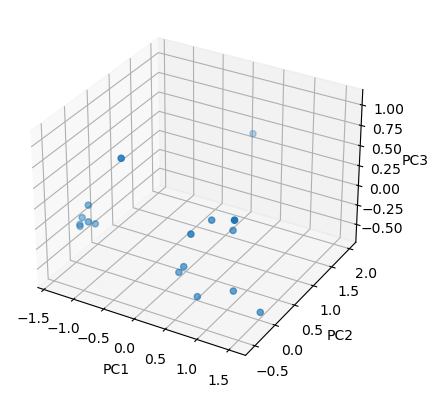

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
# create a 3D scatter plot of the first three principal components
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

In [ ]:
# fit the PCA model to the data
pca.fit(specific_procedures)

# examine the loadings of the variables on each principal component
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=specific_procedures.columns)

# print the top variables for each principal component
print('Top variables for PC1:')
print(loadings['PC1'].abs().sort_values(ascending=False)[:3])
print('\nTop variables for PC2:')
print(loadings['PC2'].abs().sort_values(ascending=False)[:3])
# print('\nTop variables for PC3:')
# print(loadings['PC3'].abs().sort_values(ascending=False)[:3])


Top variables for PC1:
Unnamed: 0
Gastroscopy (OGD) with biopsy       0.839460
Esophageal motility / pH studies    0.376004
Colonoscopy with biopsy             0.189806
Name: PC1, dtype: float64

Top variables for PC2:
Unnamed: 0
Esophageal motility / pH studies    0.809287
Colonoscopy                         0.293272
Gastroscopy (OGD) with biopsy       0.278488
Name: PC2, dtype: float64


c:\Users\WongQiHuiYve\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


1     612432.705882
2     324814.557143
3     135900.200000
4      80031.166667
5      47947.500000
6      36374.500000
7      28893.500000
8      23100.500000
9      18142.666667
10     13397.166667
11      8439.666667
12      4843.166667
13      3417.500000
14      2001.000000
dtype: float64


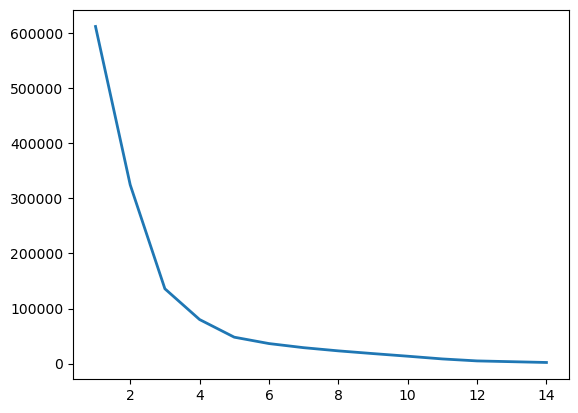

In [ ]:
sse = pd.Series(range(14),index = range(1,15))

for i in range(1,15):
    model = KMeans(n_clusters = i, random_state=0)
    model.fit(specific_procedures)
    sse[i] = model.inertia_
print(sse)
plt.plot(sse.index, sse, linewidth=2.0)

In [ ]:
specific_procedures=specific_procedures.reset_index()

total_df=pd.merge(cluster_personal_df, specific_procedures, left_on='Staff Name', right_on='index')

In [ ]:
total_df=total_df.set_index('index')
# total_df.drop('level_0',axis=1)

<AxesSubplot:>

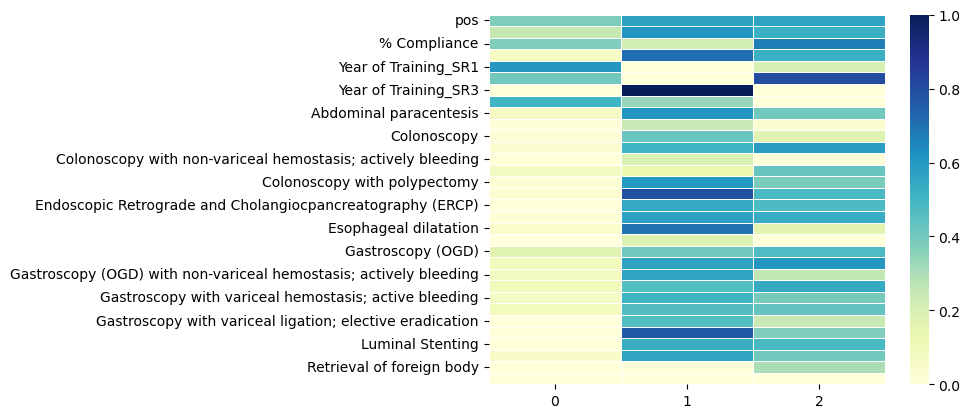

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = MinMaxScaler()
total2=scaler.fit_transform(total_df)
from sklearn.cluster import KMeans
model_total = KMeans(n_clusters = 3, random_state=0)
model_total.fit(total2)
model_total.cluster_centers_
clust_means = pd.DataFrame(model_total.cluster_centers_, columns=total_df.columns)
clust_means.T
import seaborn as sns
sns.heatmap(clust_means.T,  linewidths=.5, cmap="YlGnBu")

In [ ]:
model_total.labels_

array([0, 1, 1, 0, 2, 0, 0, 2, 2, 1, 1, 1, 0, 1, 2, 2])

c:\Users\WongQiHuiYve\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


1     612432.705882
2     324814.557143
3     135900.200000
4      80031.166667
5      47947.500000
6      36374.500000
7      28893.500000
8      23100.500000
9      18142.666667
10     13397.166667
11      8439.666667
12      4843.166667
13      3417.500000
14      2001.000000
dtype: float64


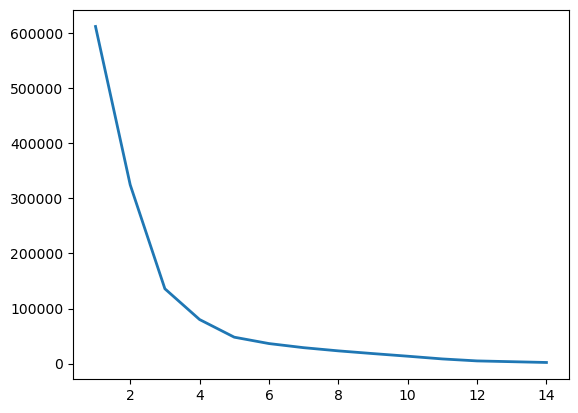

In [ ]:
sse = pd.Series(range(14),index = range(1,15))

for i in range(1,15):
    model = KMeans(n_clusters = i, random_state=0)
    model.fit(specific_procedures)
    sse[i] = model.inertia_
print(sse)
plt.plot(sse.index, sse, linewidth=2.0)

c:\Users\WongQiHuiYve\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

c:\Users\WongQiHuiYve\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



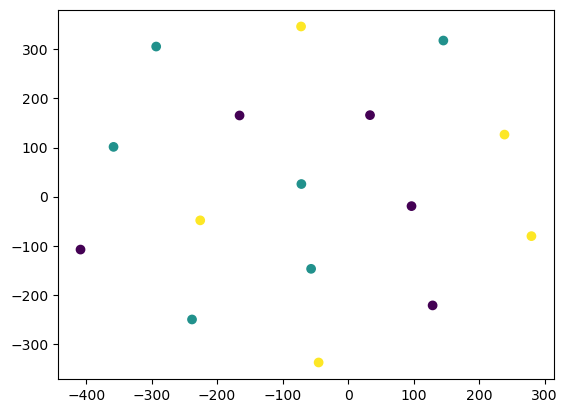

In [ ]:
from sklearn.manifold import TSNE
total_df['cluster_label'] = model_total.labels_
# Extract the features and labels
X = total_df.drop("cluster_label", axis=1).values
y = total_df["cluster_label"].values

# Apply t-SNE dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot the t-SNE visualization
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)
plt.show()

In [ ]:
import plotly.express as px
# Create parallel coordinates plot
fig = px.parallel_coordinates(total_df, color="cluster_label")
fig.show()

In [ ]:
import pandas as pd
# projects, presentations, publications, posting
# involvement cannot due to lack of data, maybe awards also
gastro=pd.read_excel('gas_all.xlsx')
gastro

In [ ]:
# specific_procedures = df.rename(columns={'A': 'X'})
# specific_procedures=specific_procedures.reset_index()
specific_procedures = specific_procedures.rename(columns={'index': 'Staff Name'})
specific_procedures=specific_procedures.drop('level_0',axis=1)
specific_procedures

Unnamed: 0,Staff Name,Gastroscopy (OGD) with biopsy,Colonoscopy with biopsy,Colonoscopy
0,Jiang Xiao Ye,334.0,38.0,5.0
1,Gabrielle Ho,101.0,0,2.0
2,Eliza Chen,14.0,0,0
3,Kang Hyun Bin,426.0,33.0,191.0
4,Amanda Koh,21.0,0,0
5,Justin Bieber,252.0,121.0,0
6,Li Xiuhuan,12.0,8.0,66.0
7,Sam Lim,207.0,35.0,0
8,Pei Wei Ping,302.0,104.0,30.0
9,Qiu Tian Ning,28.0,0,0


In [ ]:
gastro_publications=pd.read_excel('gas_all.xlsx',sheet_name="Publications")

counts = gastro_publications.groupby('Staff Name')['Title of Publication/\nChapter/Textbook'].nunique()
publications_grouped=counts.to_frame()

Staff Name
Christopher Tan     2
Francisco Tan       1
Gabrielle Ho        2
Jiang Xiao Ye       3
Pei Wei Ping        1
Rahul Rajaratnam    1
Tang Ye Bin         3
Name: Title of Publication/\nChapter/Textbook, dtype: int64

In [ ]:
gastro_presentations=pd.read_excel('gas_all.xlsx',sheet_name="Presentations")
presentation_encoded = pd.get_dummies(gastro_presentations, columns=["Type (e.g Abstracts/Oral/Poster)"])
presentation_encoded

presentation_grouped = presentation_encoded[['Staff Name', 'Type (e.g Abstracts/Oral/Poster)_ Abstract', 'Type (e.g Abstracts/Oral/Poster)_Oral','Type (e.g Abstracts/Oral/Poster)_Poster']].groupby('Staff Name').sum()
presentation_grouped

,Type (e.g Abstracts/Oral/Poster)_ Abstract,Type (e.g Abstracts/Oral/Poster)_Oral,Type (e.g Abstracts/Oral/Poster)_Poster
Staff Name,,,
Christopher Tan,0,1,0
Justin Bieber,2,0,0
Kang Hyun Bin,0,2,0
Pei Wei Ping,2,0,0
Rahul Rajaratnam,0,0,2
Tang Ye Bin,3,0,0


In [ ]:
gastro_projects=pd.read_excel('gas_all.xlsx',sheet_name="Projects")
project_encoded = pd.get_dummies(gastro_projects, columns=["Project Type (QI/Patient Safety/Research)"])

projects_grouped = project_encoded[['Staff Name', 'Project Type (QI/Patient Safety/Research)_QI']].groupby('Staff Name').sum()
projects_grouped

,Project Type (QI/Patient Safety/Research)_QI
Staff Name,
Amanda Koh,1
Andre Tan,1
Christopher Tan,1
Eliza Chen,1
Francisco Tan,1
Gabrielle Ho,1
James Wang,1
Jiang Xiao Ye,1
Justin Bieber,1


In [ ]:
gastro=pd.read_excel('gas_all.xlsx',sheet_name="History - Posting")
gastro

In [ ]:
import matplotlib.pyplot as plt
counts = gastro['Posting Institution'].value_counts()

# create a bar chart
counts.plot.bar()

# add labels and title
plt.xlabel('Color')
plt.ylabel('Count')
plt.title('Number of occurrences of each color')

# display the chart
plt.show()

In [ ]:
counts = gastro['Posting Department'].value_counts()
# create a bar chart
counts.plot.bar()

# add labels and title
plt.xlabel('Color')
plt.ylabel('Count')
plt.title('Number of occurrences of each color')

# display the chart
plt.show()

In [ ]:
import seaborn as sns
# create a cross-tabulation of values in columns A and B
cross_tab = pd.crosstab(gastro['Posting Institution'], gastro['Posting Department'])

# create a heatmap of the cross-tabulation
sns.heatmap(cross_tab, cmap='Blues', annot=True, fmt='d')

# add labels and title
plt.xlabel('B')
plt.ylabel('A')
plt.title('Values that occur together in columns A and B')

# display the chart
plt.show()

In [ ]:
gastro['Department Institution']=gastro.apply(lambda x:x['Posting Institution']+'-'+x['Posting Department'],axis=1)
gastro['Department Institution']

In [ ]:
counts = gastro['Department Institution'].value_counts()
# create a bar chart
counts.plot.bar()

# add labels and title
plt.xlabel('Color')
plt.ylabel('Count')
plt.title('Number of occurrences of each color')

# display the chart
plt.show()

In [ ]:
posting_encoded = pd.get_dummies(gastro, columns=["Department Institution"])
posting_encoded

posting_grouped = posting_encoded[['Staff Name', 'Department Institution_CGH-GenMed', 'Department Institution_CGH-GeriMed','Department Institution_NTFGH-GasEnt','Department Institution_SGH-GasEnt','Department Institution_SGH-GasHep','Department Institution_SGH-GeriMed','Department Institution_SGH-IntMed','Department Institution_SKH-GasHep','Department Institution_SKH-GenMed','Department Institution_SKH-GeriMed']].groupby('Staff Name').sum()
posting_grouped

,Department Institution_CGH-GenMed,Department Institution_CGH-GeriMed,Department Institution_NTFGH-GasEnt,Department Institution_SGH-GasEnt,Department Institution_SGH-GasHep,Department Institution_SGH-GeriMed,Department Institution_SGH-IntMed,Department Institution_SKH-GasHep,Department Institution_SKH-GenMed,Department Institution_SKH-GeriMed
Staff Name,,,,,,,,,,
Amanda Koh,1,0,0,1,0,0,0,0,0,0
Andre Tan,1,1,0,5,0,0,2,0,1,0
Christopher Tan,2,1,0,3,0,0,1,1,0,0
Eliza Chen,1,1,0,2,0,0,0,0,0,0
Francisco Tan,0,0,0,0,2,0,1,0,1,1
Gabrielle Ho,1,1,0,0,3,0,1,0,2,0
James Wang,1,1,0,1,0,0,0,0,0,0
Jiang Xiao Ye,0,0,0,0,3,0,1,0,1,1
Justin Bieber,0,0,0,0,3,0,1,0,1,1


In [ ]:
# merged_df = pd.merge(posting_grouped, presentation_grouped, on='Staff Name', how='outer')
# merged_df = pd.merge(posting_grouped, presentation_grouped, on='Staff Name', how='outer')

merged_df= pd.merge(presentation_grouped, publications_grouped, on='Staff Name', how='outer')


merged_df= pd.merge(merged_df, projects_grouped, on='Staff Name', how='outer')
merged_df= pd.merge(merged_df, specific_procedures, on='Staff Name', how='outer')

merged_df= pd.merge(merged_df, cluster_personal_df, on='Staff Name', how='outer')

merged_df=merged_df.set_index('Staff Name')
merged_df=merged_df.fillna(0)
merged_df.columns

Index(['Type (e.g Abstracts/Oral/Poster)_ Abstract',
       'Type (e.g Abstracts/Oral/Poster)_Oral',
       'Type (e.g Abstracts/Oral/Poster)_Poster',
       'Title of Publication/\nChapter/Textbook',
       'Project Type (QI/Patient Safety/Research)_QI',
       'Gastroscopy (OGD) with biopsy', 'Colonoscopy with biopsy',
       'Colonoscopy', 'pos', 'Answer', '% Compliance', 'Procedures',
       'Year of Training_SR1', 'Year of Training_SR2', 'Year of Training_SR3'],
      dtype='object')

<AxesSubplot:>

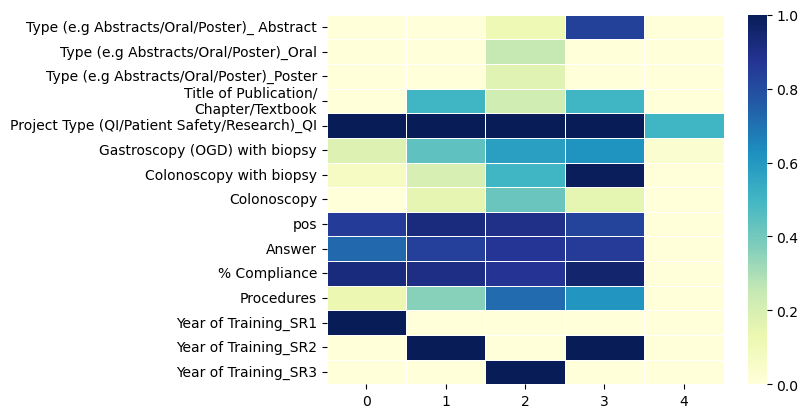

In [ ]:
# CLUSTERING 
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = MinMaxScaler()
merged_df2=scaler.fit_transform(merged_df)
from sklearn.cluster import KMeans
model_5 = KMeans(n_clusters = 5, random_state=0)
model_5.fit(merged_df2)
model_5.cluster_centers_
clust_means = pd.DataFrame(model_5.cluster_centers_, columns=merged_df.columns)
clust_means.T
import seaborn as sns
sns.heatmap(clust_means.T,  linewidths=.5, cmap="YlGnBu")

Clustering

In [4]:
import nltk 
from nltk.corpus import stopwords 
import string 
from nltk.stem import WordNetLemmatizer 


In [69]:
import pandas as pd
comments=pd.read_excel('evaluations_overall_comments.xlsx')

In [70]:
comments_df = comments.copy()
comments_df

,Target:,Evaluator:,Rotation Dates:,Service:,Answer:
0,Eliza Chen,"Dr. Ong, Andrew Ming Liang",7/1/2022-7/31/2022,- -,Eliza Chen is starting out and therefore as ex...
1,Eliza Chen,"Dr. Chan, Webber Pak Wo",7/1/2022-7/31/2022,SHS-GASTRO:BASIC ENDO-SGH,"As a new senior resident to gastroenterology, ..."
2,Eliza Chen,"Dr. Lim, Chee Hooi",7/1/2022-7/31/2022,SHS-GASTRO:BASIC ENDO-SGH,No concern
3,Eliza Chen,"Dr. Chang, Jason Pik Eu",8/1/2022-8/31/2022,SHS-GASTRO:BASIC ENDO-SGH,Overall I would rate Eliza Chen highly as a SR...
4,Eliza Chen,"Dr. Tan, Chee Kiat",8/1/2022-8/31/2022,SHS-GASTRO:BASIC ENDO-SGH,Eliza Chen has a quiet disposition and gives g...
...,...,...,...,...,...
163,Rachel Yeap,"Dr. Tan, Malcolm Teck Kiang",7/1/2022-7/31/2022,SHS-GASTRO:GEN GASTROHEP-SGH,"did a week of bleeder call, good mgmt plans an..."
164,Rachel Yeap,"Dr. Khor, Christopher Jen Lock",8/1/2022-8/31/2022,SHS-GASTRO:GEN GASTROHEP-SGH,"very competent, extremely professional, and a ..."
165,Rachel Yeap,"Dr. Liou, Wei Lun",8/1/2022-8/31/2022,SHS-GASTRO:GEN GASTROHEP-SGH,No issue. Making good progress compared to fir...
166,Rachel Yeap,"Dr. Loo, Khang Ning",9/1/2022-10/2/2022,SHS-IM:GEN MED-SGH,Rachel is clinically competent and I can trust...


In [71]:
comments_df.describe()

,Target:,Evaluator:,Rotation Dates:,Service:,Answer:
count,168,168,168,168,168
unique,17,48,7,16,167
top,Sam Lim,"Dr. Salazar, Ennaliza",9/1/2022-10/2/2022,SHS-GASTRO:GEN GASTROHEP-SGH,No concern
freq,16,8,34,46,2


In [72]:
comments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Target:          168 non-null    object
 1   Evaluator:       168 non-null    object
 2   Rotation Dates:  168 non-null    object
 3   Service:         168 non-null    object
 4   Answer:          168 non-null    object
dtypes: object(5)
memory usage: 6.7+ KB


In [73]:
# Initialize the lemmatizer 
lemmatizer = WordNetLemmatizer() 

nltk.download('stopwords') 
nltk.download('punkt') 
nltk.download('wordnet') 

def preprocess_text(text): 
    # Tokenize the text into words 
    tokens = nltk.word_tokenize(text) 
     
    # Remove stopwords 
    stop_words = set(stopwords.words('english')) 
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words] 
     
    # Remove non-alphabetic characters 
    alphabetic_tokens = [token for token in filtered_tokens if token.isalpha()] 
     
    # Remove punctuation 
    no_punct_tokens = [token for token in alphabetic_tokens if token not in string.punctuation] 
     
    # Convert tokens to lowercase 
    lowercase_tokens = [token.lower() for token in no_punct_tokens] 
     
    lemmatized_words = [lemmatizer.lemmatize(word) for word in lowercase_tokens] 
     
    # Join the tokens back into a string 
    preprocessed_text = ' '.join(lemmatized_words) 
    return preprocessed_text


new_list = []
for each_text in comments_df['Answer:']:
    new_list.append(preprocess_text(each_text))
    
comments_df['filtered_words'] = new_list
comments_df.head()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/cheryl_malfoy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/cheryl_malfoy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/cheryl_malfoy/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Target:,Evaluator:,Rotation Dates:,Service:,Answer:,filtered_words
0,Eliza Chen,"Dr. Ong, Andrew Ming Liang",7/1/2022-7/31/2022,- -,Eliza Chen is starting out and therefore as ex...,eliza chen starting therefore expected scoring...
1,Eliza Chen,"Dr. Chan, Webber Pak Wo",7/1/2022-7/31/2022,SHS-GASTRO:BASIC ENDO-SGH,"As a new senior resident to gastroenterology, ...",new senior resident gastroenterology eliza che...
2,Eliza Chen,"Dr. Lim, Chee Hooi",7/1/2022-7/31/2022,SHS-GASTRO:BASIC ENDO-SGH,No concern,concern
3,Eliza Chen,"Dr. Chang, Jason Pik Eu",8/1/2022-8/31/2022,SHS-GASTRO:BASIC ENDO-SGH,Overall I would rate Eliza Chen highly as a SR...,overall would rate eliza chen highly term medi...
4,Eliza Chen,"Dr. Tan, Chee Kiat",8/1/2022-8/31/2022,SHS-GASTRO:BASIC ENDO-SGH,Eliza Chen has a quiet disposition and gives g...,eliza chen quiet disposition give good thought...


In [74]:

# import the dataset from sklearn
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# import other required libs
import pandas as pd
import numpy as np

# string manipulation libs
import re
import string
import nltk
from nltk.corpus import stopwords

# viz libs
import matplotlib.pyplot as plt
import seaborn as sns


In [75]:
# initialize the vectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
# fit_transform applies TF-IDF to clean texts - we save the array of vectors in X
X = vectorizer.fit_transform(comments_df['filtered_words'])
X.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.40203558],
       [0.        , 0.51666983, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.419094  , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [76]:
# initialize kmeans with 3 centroids
kmeans = KMeans(n_clusters=3, random_state=42)
# fit the model
kmeans.fit(X)
# store cluster labels in a variable
clusters = kmeans.labels_

/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [44]:
[c for c in clusters][:10]

[2, 2, 0, 2, 0, 0, 1, 0, 2, 1]

In [77]:
# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(X.toarray())
# save our two dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

In [78]:
x0

array([-0.0978791 , -0.04274338, -0.05882493, -0.05241248,  0.05930644,
       -0.09928506,  0.12025916,  0.20223929, -0.14898344,  0.15320417,
       -0.28817483,  0.15993888, -0.11103487,  0.18203099, -0.07772563,
       -0.03064642, -0.17128666,  0.08223685, -0.05882493, -0.0671309 ,
       -0.01102185, -0.26906771,  0.03890205,  0.34475899,  0.00363298,
        0.09574824,  0.26822827, -0.07387409, -0.09464649,  0.21325078,
        0.02606777,  0.04780626, -0.02044948, -0.05882493, -0.13816212,
       -0.05948839,  0.30914724,  0.30789674, -0.20688784,  0.02240053,
        0.1416598 , -0.27518707, -0.18109924, -0.18554628,  0.01404971,
       -0.01081197,  0.27862891,  0.00184157, -0.09737408,  0.0081967 ,
        0.30228446,  0.11669057, -0.08863585,  0.27341398, -0.05528636,
       -0.14379233, -0.42130393, -0.22026056,  0.11025977, -0.27538744,
       -0.2242845 , -0.03578456, -0.24795067, -0.05882493, -0.25363368,
       -0.16511608, -0.10493725,  0.3885092 ,  0.11333928,  0.55

In [79]:
comments_df['cluster'] = clusters
comments_df['x0'] = x0
comments_df['x1'] = x1

In [80]:
comments_df

,Target:,Evaluator:,Rotation Dates:,Service:,Answer:,filtered_words,cluster,x0,x1
0,Eliza Chen,"Dr. Ong, Andrew Ming Liang",7/1/2022-7/31/2022,- -,Eliza Chen is starting out and therefore as ex...,eliza chen starting therefore expected scoring...,2,-0.097879,-0.081703
1,Eliza Chen,"Dr. Chan, Webber Pak Wo",7/1/2022-7/31/2022,SHS-GASTRO:BASIC ENDO-SGH,"As a new senior resident to gastroenterology, ...",new senior resident gastroenterology eliza che...,2,-0.042743,-0.242271
2,Eliza Chen,"Dr. Lim, Chee Hooi",7/1/2022-7/31/2022,SHS-GASTRO:BASIC ENDO-SGH,No concern,concern,0,-0.058825,0.007579
3,Eliza Chen,"Dr. Chang, Jason Pik Eu",8/1/2022-8/31/2022,SHS-GASTRO:BASIC ENDO-SGH,Overall I would rate Eliza Chen highly as a SR...,overall would rate eliza chen highly term medi...,2,-0.052412,-0.086569
4,Eliza Chen,"Dr. Tan, Chee Kiat",8/1/2022-8/31/2022,SHS-GASTRO:BASIC ENDO-SGH,Eliza Chen has a quiet disposition and gives g...,eliza chen quiet disposition give good thought...,0,0.059306,0.262558
...,...,...,...,...,...,...,...,...,...
163,Rachel Yeap,"Dr. Tan, Malcolm Teck Kiang",7/1/2022-7/31/2022,SHS-GASTRO:GEN GASTROHEP-SGH,"did a week of bleeder call, good mgmt plans an...",week bleeder call good mgmt plan decision maki...,0,-0.090345,0.131176
164,Rachel Yeap,"Dr. Khor, Christopher Jen Lock",8/1/2022-8/31/2022,SHS-GASTRO:GEN GASTROHEP-SGH,"very competent, extremely professional, and a ...",competent extremely professional pleasure work,1,0.220739,-0.215242
165,Rachel Yeap,"Dr. Liou, Wei Lun",8/1/2022-8/31/2022,SHS-GASTRO:GEN GASTROHEP-SGH,No issue. Making good progress compared to fir...,issue making good progress compared first year,0,0.051333,0.318915
166,Rachel Yeap,"Dr. Loo, Khang Ning",9/1/2022-10/2/2022,SHS-IM:GEN MED-SGH,Rachel is clinically competent and I can trust...,rachel clinically competent trust manage patie...,1,0.002361,-0.141097


In [81]:
def get_top_keywords(n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    df = pd.DataFrame(X.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster
    terms = vectorizer.get_feature_names_out() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score
            
get_top_keywords(10)


Cluster 0
attitude,level,knowledge,hardworking,training,sr,well,need,learning,good

Cluster 1
knowledge,responsible,also,well,able,care,good,team,patient,work

Cluster 2
medical,expectation,meet,skill,well,management,continue,knowledge,improve,clinical


In [82]:
# map clusters to appropriate labels 
cluster_map = {0: "sport", 1: "tech", 2: "religion"}
# apply mapping
comments_df['cluster'] = comments_df['cluster'].map(cluster_map)

In [83]:
comments_df

,Target:,Evaluator:,Rotation Dates:,Service:,Answer:,filtered_words,cluster,x0,x1
0,Eliza Chen,"Dr. Ong, Andrew Ming Liang",7/1/2022-7/31/2022,- -,Eliza Chen is starting out and therefore as ex...,eliza chen starting therefore expected scoring...,religion,-0.097879,-0.081703
1,Eliza Chen,"Dr. Chan, Webber Pak Wo",7/1/2022-7/31/2022,SHS-GASTRO:BASIC ENDO-SGH,"As a new senior resident to gastroenterology, ...",new senior resident gastroenterology eliza che...,religion,-0.042743,-0.242271
2,Eliza Chen,"Dr. Lim, Chee Hooi",7/1/2022-7/31/2022,SHS-GASTRO:BASIC ENDO-SGH,No concern,concern,sport,-0.058825,0.007579
3,Eliza Chen,"Dr. Chang, Jason Pik Eu",8/1/2022-8/31/2022,SHS-GASTRO:BASIC ENDO-SGH,Overall I would rate Eliza Chen highly as a SR...,overall would rate eliza chen highly term medi...,religion,-0.052412,-0.086569
4,Eliza Chen,"Dr. Tan, Chee Kiat",8/1/2022-8/31/2022,SHS-GASTRO:BASIC ENDO-SGH,Eliza Chen has a quiet disposition and gives g...,eliza chen quiet disposition give good thought...,sport,0.059306,0.262558
...,...,...,...,...,...,...,...,...,...
163,Rachel Yeap,"Dr. Tan, Malcolm Teck Kiang",7/1/2022-7/31/2022,SHS-GASTRO:GEN GASTROHEP-SGH,"did a week of bleeder call, good mgmt plans an...",week bleeder call good mgmt plan decision maki...,sport,-0.090345,0.131176
164,Rachel Yeap,"Dr. Khor, Christopher Jen Lock",8/1/2022-8/31/2022,SHS-GASTRO:GEN GASTROHEP-SGH,"very competent, extremely professional, and a ...",competent extremely professional pleasure work,tech,0.220739,-0.215242
165,Rachel Yeap,"Dr. Liou, Wei Lun",8/1/2022-8/31/2022,SHS-GASTRO:GEN GASTROHEP-SGH,No issue. Making good progress compared to fir...,issue making good progress compared first year,sport,0.051333,0.318915
166,Rachel Yeap,"Dr. Loo, Khang Ning",9/1/2022-10/2/2022,SHS-IM:GEN MED-SGH,Rachel is clinically competent and I can trust...,rachel clinically competent trust manage patie...,tech,0.002361,-0.141097


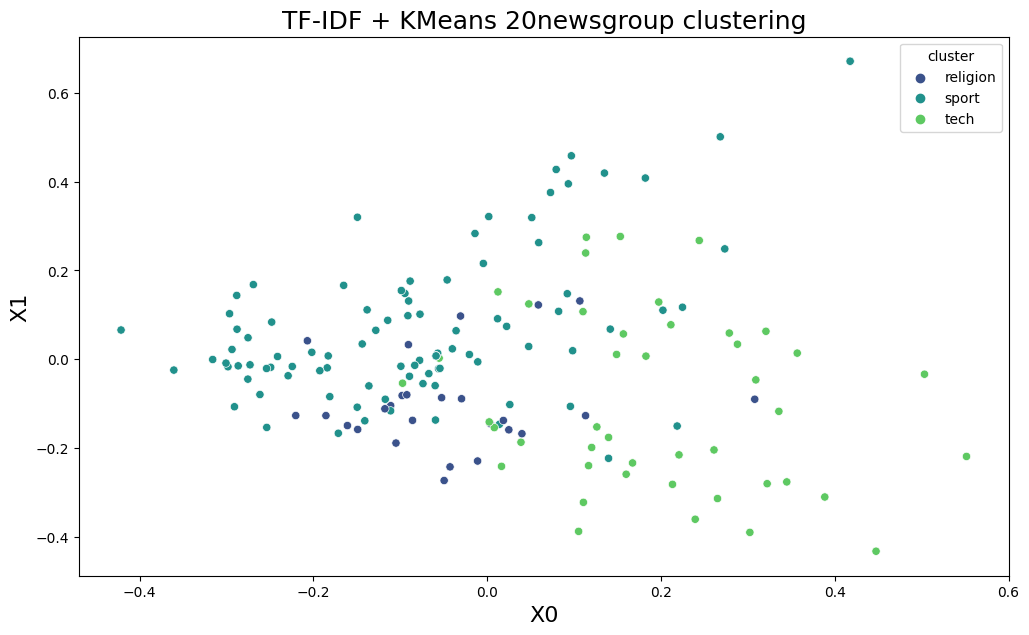

In [84]:
# set image size
plt.figure(figsize=(12, 7))
# set a title
plt.title("TF-IDF + KMeans 20newsgroup clustering", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=comments_df, x='x0', y='x1', hue='cluster', palette="viridis")
plt.show()

Another MEthod

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [113]:
comments_df = comments.copy()
comments_df

,Target:,Evaluator:,Rotation Dates:,Service:,Answer:
0,Eliza Chen,"Dr. Ong, Andrew Ming Liang",7/1/2022-7/31/2022,- -,Eliza Chen is starting out and therefore as ex...
1,Eliza Chen,"Dr. Chan, Webber Pak Wo",7/1/2022-7/31/2022,SHS-GASTRO:BASIC ENDO-SGH,"As a new senior resident to gastroenterology, ..."
2,Eliza Chen,"Dr. Lim, Chee Hooi",7/1/2022-7/31/2022,SHS-GASTRO:BASIC ENDO-SGH,No concern
3,Eliza Chen,"Dr. Chang, Jason Pik Eu",8/1/2022-8/31/2022,SHS-GASTRO:BASIC ENDO-SGH,Overall I would rate Eliza Chen highly as a SR...
4,Eliza Chen,"Dr. Tan, Chee Kiat",8/1/2022-8/31/2022,SHS-GASTRO:BASIC ENDO-SGH,Eliza Chen has a quiet disposition and gives g...
...,...,...,...,...,...
163,Rachel Yeap,"Dr. Tan, Malcolm Teck Kiang",7/1/2022-7/31/2022,SHS-GASTRO:GEN GASTROHEP-SGH,"did a week of bleeder call, good mgmt plans an..."
164,Rachel Yeap,"Dr. Khor, Christopher Jen Lock",8/1/2022-8/31/2022,SHS-GASTRO:GEN GASTROHEP-SGH,"very competent, extremely professional, and a ..."
165,Rachel Yeap,"Dr. Liou, Wei Lun",8/1/2022-8/31/2022,SHS-GASTRO:GEN GASTROHEP-SGH,No issue. Making good progress compared to fir...
166,Rachel Yeap,"Dr. Loo, Khang Ning",9/1/2022-10/2/2022,SHS-IM:GEN MED-SGH,Rachel is clinically competent and I can trust...


In [206]:
# Initialize the lemmatizer 
lemmatizer = WordNetLemmatizer() 

nltk.download('stopwords') 
nltk.download('punkt') 
nltk.download('wordnet') 

def preprocess_text(text): 
    # Tokenize the text into words 
    tokens = nltk.word_tokenize(text) 
     
    # Remove stopwords 
    stop_words = set(stopwords.words('english')) 
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words] 
     
    # Remove non-alphabetic characters 
    alphabetic_tokens = [token for token in filtered_tokens if token.isalpha()] 
     
    # Remove punctuation 
    no_punct_tokens = [token for token in alphabetic_tokens if token not in string.punctuation] 
     
    # Convert tokens to lowercase 
    lowercase_tokens = [token.lower() for token in no_punct_tokens] 
     
    lemmatized_words = [lemmatizer.lemmatize(word) for word in lowercase_tokens] 
     
    # Join the tokens back into a string 
    preprocessed_text = ' '.join(lemmatized_words) 
    return preprocessed_text


new_list = []
for each_text in comments_df['Answer:']:
    new_list.append(preprocess_text(each_text))
    
comments_df['filtered_words'] = new_list

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/cheryl_malfoy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/cheryl_malfoy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/cheryl_malfoy/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [207]:
comments_df

,Target:,Evaluator:,Rotation Dates:,Service:,Answer:,filtered_words
0,Eliza Chen,"Dr. Ong, Andrew Ming Liang",7/1/2022-7/31/2022,- -,Eliza Chen is starting out and therefore as ex...,eliza chen starting therefore expected scoring...
1,Eliza Chen,"Dr. Chan, Webber Pak Wo",7/1/2022-7/31/2022,SHS-GASTRO:BASIC ENDO-SGH,"As a new senior resident to gastroenterology, ...",new senior resident gastroenterology eliza che...
2,Eliza Chen,"Dr. Lim, Chee Hooi",7/1/2022-7/31/2022,SHS-GASTRO:BASIC ENDO-SGH,No concern,concern
3,Eliza Chen,"Dr. Chang, Jason Pik Eu",8/1/2022-8/31/2022,SHS-GASTRO:BASIC ENDO-SGH,Overall I would rate Eliza Chen highly as a SR...,overall would rate eliza chen highly term medi...
4,Eliza Chen,"Dr. Tan, Chee Kiat",8/1/2022-8/31/2022,SHS-GASTRO:BASIC ENDO-SGH,Eliza Chen has a quiet disposition and gives g...,eliza chen quiet disposition give good thought...
...,...,...,...,...,...,...
163,Rachel Yeap,"Dr. Tan, Malcolm Teck Kiang",7/1/2022-7/31/2022,SHS-GASTRO:GEN GASTROHEP-SGH,"did a week of bleeder call, good mgmt plans an...",week bleeder call good mgmt plan decision maki...
164,Rachel Yeap,"Dr. Khor, Christopher Jen Lock",8/1/2022-8/31/2022,SHS-GASTRO:GEN GASTROHEP-SGH,"very competent, extremely professional, and a ...",competent extremely professional pleasure work
165,Rachel Yeap,"Dr. Liou, Wei Lun",8/1/2022-8/31/2022,SHS-GASTRO:GEN GASTROHEP-SGH,No issue. Making good progress compared to fir...,issue making good progress compared first year
166,Rachel Yeap,"Dr. Loo, Khang Ning",9/1/2022-10/2/2022,SHS-IM:GEN MED-SGH,Rachel is clinically competent and I can trust...,rachel clinically competent trust manage patie...


In [214]:
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 8000,
    stop_words = 'english'
)
tfidf.fit(comments['Answer:'])
text = tfidf.transform(comments['Answer:'])

/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters


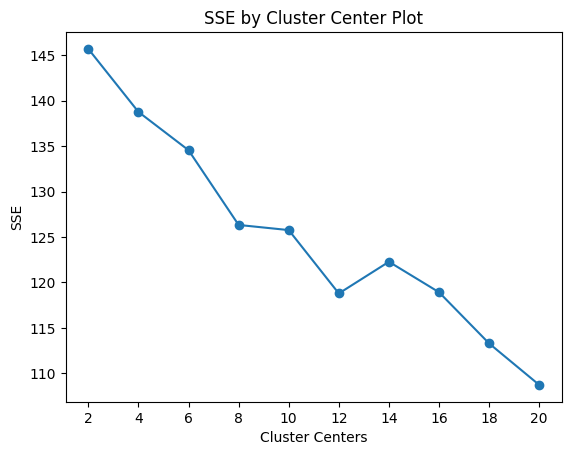

In [209]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(text, 20)

In [215]:
clusters = MiniBatchKMeans(n_clusters=8, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)

/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [211]:
len(clusters)

168

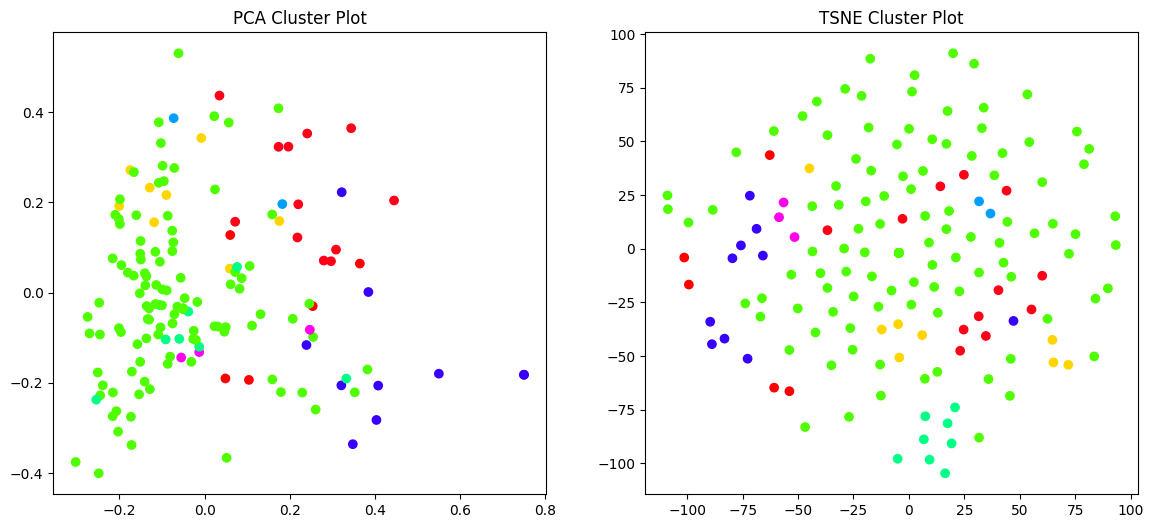

In [216]:
def plot_tsne_pca(data, labels):
    # this is flexible with min, no error, will return 3 or less than that
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=160, replace=False)
    # print(data[max_items,:].todense())
    pca = PCA(n_components=2).fit_transform(np.squeeze(np.asarray(data[max_items,:].todense())))
    # pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(np.squeeze(np.asarray(data[max_items,:].todense()))))
    
    idx = np.random.choice(range(pca.shape[0]), size=160, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(text, clusters)

In [218]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(text, clusters, tfidf.get_feature_names_out(), 10)


Cluster 0
rahul,independent,year,needs,performance,knowledge,communication,good,making,decision

Cluster 1
needs,juniors,management,knowledge,medical,improve,skills,meets,continue,clinical

Cluster 2
skills,team,training,sr,improve,able,good,knowledge,patients,learning

Cluster 3
reading,knowledge,reliable,good,patient,level,care,sr,responsible,hardworking

Cluster 4
hard,follow,expected,expectations,improvement,good,able,manage,working,team

Cluster 5
knowledge,reading,need,month,progressing,cases,reliable,learning,attitude,good

Cluster 6
improve,hardworking,hard,follow,expectations,good,skills,endoscopy,expected,progressing

Cluster 7
puts,team,patient,competent,independently,knowledge,does,professional,good,work


Another Method

In [221]:
comments_df = comments.copy()
comments_df 

,Target:,Evaluator:,Rotation Dates:,Service:,Answer:
0,Eliza Chen,"Dr. Ong, Andrew Ming Liang",7/1/2022-7/31/2022,- -,Eliza Chen is starting out and therefore as ex...
1,Eliza Chen,"Dr. Chan, Webber Pak Wo",7/1/2022-7/31/2022,SHS-GASTRO:BASIC ENDO-SGH,"As a new senior resident to gastroenterology, ..."
2,Eliza Chen,"Dr. Lim, Chee Hooi",7/1/2022-7/31/2022,SHS-GASTRO:BASIC ENDO-SGH,No concern
3,Eliza Chen,"Dr. Chang, Jason Pik Eu",8/1/2022-8/31/2022,SHS-GASTRO:BASIC ENDO-SGH,Overall I would rate Eliza Chen highly as a SR...
4,Eliza Chen,"Dr. Tan, Chee Kiat",8/1/2022-8/31/2022,SHS-GASTRO:BASIC ENDO-SGH,Eliza Chen has a quiet disposition and gives g...
...,...,...,...,...,...
163,Rachel Yeap,"Dr. Tan, Malcolm Teck Kiang",7/1/2022-7/31/2022,SHS-GASTRO:GEN GASTROHEP-SGH,"did a week of bleeder call, good mgmt plans an..."
164,Rachel Yeap,"Dr. Khor, Christopher Jen Lock",8/1/2022-8/31/2022,SHS-GASTRO:GEN GASTROHEP-SGH,"very competent, extremely professional, and a ..."
165,Rachel Yeap,"Dr. Liou, Wei Lun",8/1/2022-8/31/2022,SHS-GASTRO:GEN GASTROHEP-SGH,No issue. Making good progress compared to fir...
166,Rachel Yeap,"Dr. Loo, Khang Ning",9/1/2022-10/2/2022,SHS-IM:GEN MED-SGH,Rachel is clinically competent and I can trust...


Another method

In [127]:
comments_df = comments.copy()
comments_df

,Target:,Evaluator:,Rotation Dates:,Service:,Answer:
0,Eliza Chen,"Dr. Ong, Andrew Ming Liang",7/1/2022-7/31/2022,- -,Eliza Chen is starting out and therefore as ex...
1,Eliza Chen,"Dr. Chan, Webber Pak Wo",7/1/2022-7/31/2022,SHS-GASTRO:BASIC ENDO-SGH,"As a new senior resident to gastroenterology, ..."
2,Eliza Chen,"Dr. Lim, Chee Hooi",7/1/2022-7/31/2022,SHS-GASTRO:BASIC ENDO-SGH,No concern
3,Eliza Chen,"Dr. Chang, Jason Pik Eu",8/1/2022-8/31/2022,SHS-GASTRO:BASIC ENDO-SGH,Overall I would rate Eliza Chen highly as a SR...
4,Eliza Chen,"Dr. Tan, Chee Kiat",8/1/2022-8/31/2022,SHS-GASTRO:BASIC ENDO-SGH,Eliza Chen has a quiet disposition and gives g...
...,...,...,...,...,...
163,Rachel Yeap,"Dr. Tan, Malcolm Teck Kiang",7/1/2022-7/31/2022,SHS-GASTRO:GEN GASTROHEP-SGH,"did a week of bleeder call, good mgmt plans an..."
164,Rachel Yeap,"Dr. Khor, Christopher Jen Lock",8/1/2022-8/31/2022,SHS-GASTRO:GEN GASTROHEP-SGH,"very competent, extremely professional, and a ..."
165,Rachel Yeap,"Dr. Liou, Wei Lun",8/1/2022-8/31/2022,SHS-GASTRO:GEN GASTROHEP-SGH,No issue. Making good progress compared to fir...
166,Rachel Yeap,"Dr. Loo, Khang Ning",9/1/2022-10/2/2022,SHS-IM:GEN MED-SGH,Rachel is clinically competent and I can trust...


In [135]:
# Setup
!pip3 install -q wordcloud
import wordcloud

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import unicodedata
import re
import string

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import NMF, LatentDirichletAllocation, PCA
from sklearn import metrics
from sklearn.feature_extraction import _stop_words
from sklearn.feature_extraction._stop_words import ENGLISH_STOP_WORDS  # a longer list of stopwords than nltk

pd.set_option("display.precision", 4)
np.set_printoptions(precision=4)

In [137]:
#@title
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 

# Get stopwords, stemmer and lemmatizer
stemmer = nltk.stem.PorterStemmer()
lemmatizer = nltk.stem.WordNetLemmatizer()
general_stopwords = ENGLISH_STOP_WORDS  # note: sklearn has a longer list than nltk.corpus.stopwords.words('english')
domain_stopwords = ['subject', 'organization', 'lines', 'from', 'reply-to', 'distribution', 'keywords', 'article', 'newsreader', 'nntp-posting-host', 'writes', 'x-newsreader', 'summary']

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/cheryl_malfoy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/cheryl_malfoy/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/cheryl_malfoy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/cheryl_malfoy/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [139]:
def remove_accents(data):
    return ''.join(x for x in unicodedata.normalize('NFKD', data) if x in string.ascii_letters or x == " ")

def remove_misc(data):
    return data.replace('\n', '')

---
Before removing POS that are not nouns and lemmatization:
df_token_lists.shape: (1502, 486)
df_token_lists.head(5):
         0              1           2       3      4          5            6        7      8        9           10                       11        12       13     14           15        16    17        18    19       20          21          22        23     24     25      26         27         28        29       30         31          32          33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99  100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165

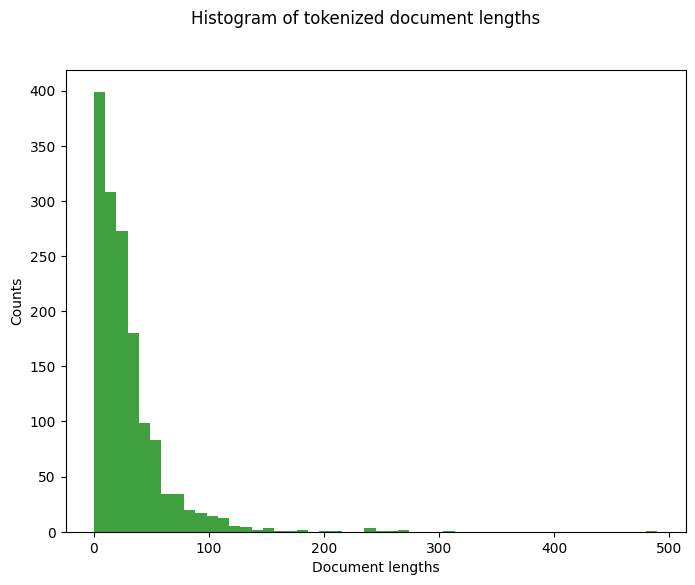

In [143]:
def preprocess_documents(data_samples, data_classes, general_stopwords, domain_stopwords, stemmer, lemmatizer, is_skip_header=True, is_print=False, is_plot=False):
    '''
    Preprocess documents
    
    Parameters:
    data_samples: list of data samples
    data_classes: list of classes
    general_stopwords: list of stopwords used in general
    domain_stopwords: domain specific stopwords that should not appear in the word cloud
    stemmer: the stemmer method
    lemmatizer: the lemmatizer method
    is_skip_header: boolean to skip the header section in each newsgroup
    
    Return:
    df_token_lists: dataframe of tokenized word lists
    df_lem_strings: dataframe of lemmatized word lists
    data_samples_processed: list of the processed lemmatized strings
    data_processed: list of tuples of data_samples_processed and their data classes
    '''

    # POS (Parts Of Speech)
    # For: nouns, adjectives, verbs and adverbs use {'NN':'n', 'JJ':'a', 'VB':'v', 'RB':'r'} 
    DI_POS_TYPES = {'NN':'n'}  # Just the nouns
    POS_TYPES = list(DI_POS_TYPES.keys())

    # Constraints on tokens
    MIN_STR_LEN = 3
    MAX_TOKENS = 1200
    RE_VALID = '[a-zA-Z]'
    PUNCT = ['@', '_', '.']

    # Process all data samples
    li_tokens = []
    li_token_lists = []
    li_lem_strings = []
    len_tokens = []
    
    for i,text in enumerate(data_samples):

        # Tokenize by sentence, then by lowercase word
        tokens = []
        if is_skip_header:
            # Skip most of the first section that represents the header metadata
            for j,sent in enumerate(nltk.sent_tokenize(text)):
                if j == 0:
                    li_sents = [s.strip() for s in sent.splitlines()]
                    li_sents = [s for s in li_sents if len(s) > 0 and not s.lower().startswith(tuple(domain_stopwords))]
                    tokens0 = [token.lower() for sent in li_sents for token in nltk.word_tokenize(sent)]
                    tokens = []
                    for t in tokens0:
                        is_in = False
                        for p in PUNCT:
                            if p in t:
                                is_in = True
                                break
                        
                        if not is_in:    
                            tokens.append(t)
                    
                    continue

            for word in nltk.word_tokenize(sent):
                tokens.append(word.lower())
        else:
            tokens = [token.lower() for sent in nltk.sent_tokenize(text) for token in nltk.word_tokenize(sent)]
        
        # Remove stopwords
        tokens = [x for x in tokens if x not in general_stopwords]
        tokens = [x for x in tokens if x not in domain_stopwords] 
        
        # Limit
        tokens = tokens[:MAX_TOKENS]
        len_tokens.append(len(tokens))

        # Process all tokens per quote
        li_tokens_quote = []
        li_tokens_quote_lem = []
        for token in tokens:
            # Remove email addresses
            if '@' in token:
                continue
            
            # Remove accents
            t = remove_accents(token)

            # Remove misc
            t = remove_misc(t)

            # Remove punctuation
            t = str(t).translate(string.punctuation)
            li_tokens_quote.append(t)

            # Add token that represents "no lemmatization match"
            li_tokens_quote_lem.append('-') # this token will be removed if a lemmatization match is found below

            # Process each token
            if t not in general_stopwords:
                if re.search(RE_VALID, t):
                    if len(t) >= MIN_STR_LEN:
                        # Note that the POS (Part Of Speech) is necessary as input to the lemmatizer 
                        # (otherwise it assumes the word is a noun)
                        pos = nltk.pos_tag([t])[0][1][:2]
                        pos2 = 'n'  # set default to noun
                        if pos in DI_POS_TYPES:
                            pos2 = DI_POS_TYPES[pos]

                        stem = stemmer.stem(t)
                        lem = lemmatizer.lemmatize(t, pos=pos2)  # lemmatize with the correct POS

                        if pos in POS_TYPES:
                            li_tokens.append((t, stem, lem, pos))

                            # Remove the '-' token and append the lemmatization match
                            li_tokens_quote_lem = li_tokens_quote_lem[:-1] 
                            li_tokens_quote_lem.append(lem)

        # Build list of token lists from lemmatized tokens
        li_token_lists.append(li_tokens_quote)

        # Build list of strings from lemmatized tokens
        str_li_tokens_quote_lem = ' '.join(li_tokens_quote_lem)
        li_lem_strings.append(str_li_tokens_quote_lem)

    # Build resulting dataframes from lists
    df_token_lists = pd.DataFrame(li_token_lists)

    # Replace None with empty string
    for c in df_token_lists:
        if str(df_token_lists[c].dtype) in ('object', 'string_', 'unicode_'):
            df_token_lists[c].fillna(value='', inplace=True)

    df_lem_strings = pd.DataFrame(li_lem_strings, columns=['lem string'])

    # Build a dataset that corresponds the processed strings to the class labels
    data_samples_processed = [x.replace('-','') for x in li_lem_strings]
    data_processed = list(zip(data_classes, data_samples_processed))
    
    if is_print:
        print("---")
        print("Before removing POS that are not nouns and lemmatization:")
        print("df_token_lists.shape:", df_token_lists.shape)
        print("df_token_lists.head(5):")
        print(df_token_lists.head(5).to_string())
        
        print("---")
        print("After removing POS that are not nouns and lemmatization:")
        print("df_lem_strings.head():")
        print(df_lem_strings.head().to_string())
        
        print("---")
        for i,v in enumerate(data_processed[:5]):
            print(i,v)

    # Plot histogram of tokenized document lengths
    if is_plot:
        fig = plt.figure(figsize=(8,6))
        plt.suptitle("Histogram of tokenized document lengths")
        plt.xlabel("Document lengths")
        plt.ylabel("Counts")
        n, bins, patches = plt.hist(len_tokens, bins=50, density=False, facecolor='g', alpha=0.75)
        plt.show()
    
    return df_token_lists, df_lem_strings, data_samples_processed, data_processed

# Preprocess documents
df_token_lists, df_lem_strings, data_samples_processed, data_processed = \
preprocess_documents(data_samples, data_classes, general_stopwords, domain_stopwords, stemmer, lemmatizer, is_skip_header=True, is_print=True, is_plot=True)


In [136]:
from sklearn.datasets import fetch_20newsgroups
CATEGORIES = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

IS_TRAIN_SET = False  # get the test set so that we can compare performance to the one documented on the above scikit web page

if IS_TRAIN_SET:
    news_docs = fetch_20newsgroups(subset='train', categories=CATEGORIES, shuffle=True, random_state=42)
else:
    news_docs = fetch_20newsgroups(subset='test', categories=CATEGORIES, shuffle=True, random_state=42)

TARGET_NAMES = news_docs.target_names
print("TARGET_NAMES:", TARGET_NAMES)
print("len(news_docs.data):", len(news_docs.data))

print(type(news_docs))
data_samples = news_docs.data
data_classes = news_docs.target
print("data_classes:", data_classes)

n_topic_clusters = np.unique(data_classes).shape[0]
print("n_topic_clusters:", n_topic_clusters)

print("Class distribution:")
print(pd.Series(data_classes).value_counts())

TARGET_NAMES: ['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']
len(news_docs.data): 1502
<class 'sklearn.utils._bunch.Bunch'>
data_classes: [2 2 2 ... 2 2 1]
n_topic_clusters: 4
Class distribution:
3    398
2    396
1    389
0    319
dtype: int64
